<a href="https://colab.research.google.com/github/HaseemArshad/LeagueofLegendsSalaryModel/blob/main/League_of_Legends_Salary_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Generating the Data/Data Collection
Creating 4 dataframes that are synthetic generated data
1. players
2. teams
3. social media
4. chinese social media

In [1]:
#import our libraries for buillding our data
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import random
from scipy.stats import zscore

## 1. players table

Here we are creating the player tables which includes:
1. player game_tag
2. the region they play in
3. the role they play in league of legends
4. their highest rank on their league accounts
5. their league account leves
6. number of games played in their careers
7. their winrate in game
8. their career length in days
9. and their average tournament placement
10. their teams
11. their current salary
12. their winnings from tournament

At the end we save the initial table to a CSV

In [2]:
def generate_synthetic_lol_data_with_playerstats(num_records=30000):
    # create random seed
    np.random.seed(42)
    random.seed(42)

    #define set data (region, teams, roles, rank of account, tier of the team, set winnings to tier)
    regions_teams = {
        'LCK (KR)': ['T1', 'Gen.G', 'DRX', 'KT Rolster', 'Dplus'],
        'LPL (CN)': ['JD Gaming', 'Bilibili Gaming', 'EDG', 'RNG', 'FPX'],
        'LEC (EU)': ['G2 Esports', 'Fnatic', 'Mad Lions KOI', 'Team BDS', 'GIANTX'],
        'LCS (NA)': ['Cloud9', '100 Thieves', 'FlyQuest', 'Team Liquid', 'Dignitas'],
        'sdfkj': ['Never Sleep', 'Golden Dragon', 'Pajamas Party', '', '']
    }
    roles = ['Top', 'Jungle', 'Mid', 'ADC', 'Support']
    ranks = ['Diamond', 'Master', 'Grandmaster', 'Challenger']

    tier_1 = ['T1', 'Gen.G', 'DRX', 'KT Rolster', 'Dplus', 'JD Gaming', 'Bilibili Gaming', 'EDG', 'RNG', 'FPX', 'G2 Esports', 'Fnatic']
    tier_2 = ['Cloud9', '100 Thieves', 'FlyQuest', 'Team Liquid', 'Dignitas', 'Mad Lions KOI', 'Team BDS', 'GIANTX']

    team_winnings_ranges = {
        'tier_1': (300000, 600000),
        'tier_2': (100000, 300000)
    }

    #functions used to generate player name
    def generate_player_name():
        prefixes = ['Cool', 'Dark', 'Sky', 'Storm', 'Fire', 'Ice', 'Thunder', 'Shadow']
        suffixes = ['Knight', 'Slayer', 'Hunter', 'Master', 'King', 'Lord', 'Warrior']
        numbers = [str(random.randint(0, 999)).zfill(3) for _ in range(1000)]
        return random.choice(prefixes) + random.choice(suffixes) + random.choice(numbers)

    #function used to assign winnings depending on the team level
    def assign_winnings(team):
        if team in tier_1:
            return random.randint(*team_winnings_ranges['tier_1'])
        elif team in tier_2:
            return random.randint(*team_winnings_ranges['tier_2'])
        return random.randint(1000, 7000)

    #making salary directly correlate to team and player win_rate (had to do this or else synthetic data has no correlation)
    def assign_salary_with_winrate(team, win_rate):
        if win_rate >= 0.7:
            salary_range = (700000, 1200000)
        elif win_rate >= 0.5:
            salary_range = (400000, 850000)
        else:
            salary_range = (250000, 600000)

        if team in tier_1:
            salary_range = (salary_range[0] + 100000, salary_range[1] + 200000)
        elif team in tier_2:
            salary_range = (salary_range[0] + 50000, salary_range[1] + 150000)
        else:
            salary_range = (salary_range[0] - 50000, salary_range[1] - 100000)
        return random.randint(*salary_range)


    #the columns in the player_df
    data = {
        'game_tag': [generate_player_name() for _ in range(num_records)],
        'region': np.random.choice(list(regions_teams.keys()), num_records),
        'role': np.random.choice(roles, num_records),
        'highest_rank': np.random.choice(ranks, num_records),
        'highest_account_level': np.random.normal(450, 50, num_records),
        'games_played': np.random.normal(50, 15, num_records).astype(int),
        'win_rate': np.random.normal(0.52, 0.08, num_records),
        'career_length (days)': np.random.normal(1354, 500, num_records),
        'average_tournament_placement': np.random.randint(1, 11, num_records),
    }

    df = pd.DataFrame(data)

    #assign cols based on their respective functions
    df['team'] = df['region'].apply(lambda region: random.choice(regions_teams[region]))
    df['salary'] = df.apply(lambda row: assign_salary_with_winrate(row['team'], row['win_rate']), axis=1)
    df['winnings'] = df['team'].apply(assign_winnings)

    # Apply realistic constraints (needed since random.normal distributes on a bell curve)
    # gives what range to cut off each col values at
    df['games_played'] = np.clip(df['games_played'], 10, 100)
    df['win_rate'] = np.clip(df['win_rate'], 0.3, 0.75).round(3)
    df['career_length (days)'] = np.ceil(np.clip(df['career_length (days)'], 152, 2556)).astype(int)
    df['highest_account_level'] = np.floor(np.clip(df['highest_account_level'], 300, 600)).astype(int)

    return df

#generaate the player table
player_df = generate_synthetic_lol_data_with_playerstats()

#save DF to a CSV
player_df.to_csv('player_table_initial.csv', index=False)

player_df

,game_tag,region,role,highest_rank,highest_account_level,games_played,win_rate,career_length (days),average_tournament_placement,team,salary,winnings
0,IceWarrior292,LCS (NA),Jungle,Diamond,425,48,0.371,2276,4,Team Liquid,349109,259988
1,FireWarrior388,sdfkj,Jungle,Grandmaster,522,31,0.477,1363,6,Pajamas Party,282010,5697
2,IceLord172,LEC (EU),ADC,Master,501,35,0.606,2110,7,GIANTX,536213,227319
3,StormMaster474,sdfkj,Jungle,Challenger,380,40,0.453,826,4,Never Sleep,208485,4290
4,SkyMaster173,sdfkj,ADC,Grandmaster,401,69,0.567,573,10,Pajamas Party,546887,4927
...,...,...,...,...,...,...,...,...,...,...,...,...
29995,ThunderWarrior691,LCK (KR),Top,Diamond,492,10,0.495,1249,9,DRX,399872,554867
29996,ThunderKing424,LPL (CN),Jungle,Master,413,62,0.489,1915,2,JD Gaming,628174,326942
29997,SkyKnight052,LCK (KR),Top,Master,498,44,0.613,777,3,Dplus,635631,550120
29998,CoolMaster259,LPL (CN),Mid,Grandmaster,428,23,0.388,1416,1,JD Gaming,793001,504007


## 2. teams table

Using the players table we already created, we get the unique subset of teams and region in order to start our team_df and save it as tr_df

In [3]:
# get the team and region from player_df
teams = player_df[['team', 'region']].drop_duplicates()

# create a dataframe which will now be the basis of our teams_df
tr_df = teams.reset_index(drop=True)

tr_df

,team,region
0,Team Liquid,LCS (NA)
1,Pajamas Party,sdfkj
2,GIANTX,LEC (EU)
3,Never Sleep,sdfkj
4,EDG,LPL (CN)
5,Team BDS,LEC (EU)
6,Fnatic,LEC (EU)
7,Golden Dragon,sdfkj
8,FlyQuest,LCS (NA)
9,,sdfkj


Here we are generating teams data with the attributes being:
1. team name
2. team region they play in
3. the winrate of the team
4. their most recent tournament placements
5. the rank of the tournaments they play in
6. team twitter followers
7. team weibo followers (as league is one of the biggest esports in china and has a large fanbase. weibo is china's largest social media platform)
8. team win streak

In [4]:
def generate_team_data(tr_df, player_df, num_records=30):
    # create seed
    np.random.seed(42)
    random.seed(42)

    # set data
    tier_1 = ['T1', 'Gen.G', 'DRX', 'KT Rolster', 'Dplus', 'JD Gaming', 'Bilibili Gaming', 'EDG', 'RNG', 'FPX', 'G2 Esports', 'Fnatic']
    tier_2 = ['Cloud9', '100 Thieves', 'FlyQuest', 'Team Liquid', 'Dignitas', 'Mad Lions KOI', 'Team BDS', 'GIANTX']

    # calculating median salary for each team
    team_median_salary = player_df.groupby('team')['salary'].median()

    #func to give each team an official tournament tier
    def assign_tournament_tier(team):
        median_salary = team_median_salary.get(team, 0)
        if median_salary >= 650000:
            return random.choices(['S-Tier', 'A-Tier'], weights=[70, 30], k=1)[0]
        elif 640000 <= median_salary < 650000:
            return 'A-Tier'
        elif 600000 <= median_salary < 640000:
            return 'B-Tier'
        else:
            return 'C-Tier'

    #generate twitter followers depending on region
    # LPL has a lesser follower range as most of their fanbase is in china which doesn't allow for twitter
    def generate_twitter_follower(region):
        if region == 'LPL (CN)':
            min_followers, max_followers = (500000, 700000)
        else:
            min_followers, max_followers = (900000, 2500000)
        return random.randint(min_followers, max_followers)

    # generate weibo followers depending on region
    # LPL's main social media so more followers for this region
    def generate_weibo_follower(region):
        if region == 'LPL (CN)':
            min_followers, max_followers = (900000, 3000000)
        else:
            min_followers, max_followers = (500000, 700000)
        return random.randint(min_followers, max_followers)

    #depending on team tier, generate team win_streak
    def assign_win_streaks(team):
        if team in tier_1:
            return random.randint(5, 20)
        elif team in tier_2:
            return random.randint(3, 10)
        return random.randint(1, 3)

    # generate cols for team_df
    data = {
        'team': tr_df['team'],
        'region': tr_df['region'],
        'team_win_rate': np.random.normal(0.52, 0.08, num_records),
        'team_recent_tournament_placement': np.random.randint(1, 11, num_records),
    }

    df = pd.DataFrame(data)

    # assign values to cols based on their respective functions
    df['team_tournament_rank'] = df['team'].apply(assign_tournament_tier)
    df['twitter_followers'] = df['region'].apply(generate_twitter_follower)
    df['weibo_followers'] = df['region'].apply(generate_weibo_follower)
    df['team_win_streak'] = df['team'].apply(assign_win_streaks)

    # adding constraints for realism
    df['team_win_rate'] = np.clip(df['team_win_rate'], 0.3, 0.75).round(3)

    return df

#generating the dataset
team_df = generate_team_data(tr_df, player_df, tr_df.shape[0])

# saving the dataset to csv
team_df.to_csv('team_table_with_salary_based_tiers.csv', index=False)

team_df


,team,region,team_win_rate,team_recent_tournament_placement,team_tournament_rank,twitter_followers,weibo_followers,team_win_streak
0,Team Liquid,LCS (NA),0.560,9,B-Tier,955649,599595,7
1,Pajamas Party,sdfkj,0.509,3,C-Tier,2077016,525353,1
2,GIANTX,LEC (EU),0.572,5,A-Tier,1316992,594104,6
3,Never Sleep,sdfkj,0.642,3,C-Tier,2401601,590165,1
4,EDG,LPL (CN),0.501,7,S-Tier,670363,2009480,17
5,Team BDS,LEC (EU),0.501,5,B-Tier,2370785,511390,7
6,Fnatic,LEC (EU),0.646,9,S-Tier,2042825,691294,19
7,Golden Dragon,sdfkj,0.581,7,C-Tier,1779796,620435,3
8,FlyQuest,LCS (NA),0.482,2,A-Tier,1362297,640568,8
9,,sdfkj,0.563,4,C-Tier,1842059,532722,1


## 3. western social
1. Get the unique game_tag of the player as well as the regions associated to each player.  
2. I added 9% of chinese players to simulate reality where chinese players uses VPN to create accounts.  
3. saved into start_df

In [5]:
# get players and region from player_df
start_df = player_df[['game_tag', 'region']].drop_duplicates(subset='game_tag')

#get a percentage of LPL players and add into the start_df (starter for socmed_df)
percentage_to_keep = 0.09
lpl_df = start_df[start_df['region'] == 'LPL (CN)']
sampled = lpl_df.sample(frac=percentage_to_keep, random_state=42)
start_df = pd.concat([start_df[start_df['region'] != 'LPL (CN)'], sampled])

# we have to reset the index so that its readable
start_df = start_df.reset_index(drop=True)

start_df

,game_tag,region
0,IceWarrior292,LCS (NA)
1,FireWarrior388,sdfkj
2,IceLord172,LEC (EU)
3,StormMaster474,sdfkj
4,SkyMaster173,sdfkj
...,...,...
19039,DarkLord923,LPL (CN)
19040,ShadowKing472,LPL (CN)
19041,ThunderKnight054,LPL (CN)
19042,ShadowWarrior216,LPL (CN)


Generated social media data:
1. game_tag
2. region each players play in
3. twitter followers
4. instagram followers
5. livestream channel followers
6. average livestream viewership of their channel

In [6]:
def generate_socmed_data(start_df, num_records=30):
    # create random seed
    np.random.seed(42)
    random.seed(42)

    # generate the synthetic data
    data = {
        'game_tag': start_df['game_tag'],
        'region': start_df['region'],
        'twitter_followers': np.random.randint(1000, 2000000, num_records),
        'instagram_followers': np.random.randint(1000, 2000000, num_records),
        'livestream_channel_followers': np.random.randint(6000, 500000, num_records),
        'avg_livestream_viewership': np.random.randint(10000, 150000, num_records)
    }

    df = pd.DataFrame(data)


    return df

#creating the dataset
socmed_df = generate_socmed_data(start_df, start_df.shape[0])

#creating a csv out of the dataset
socmed_df.to_csv('socmed_table_initial.csv', index=False)

socmed_df

,game_tag,region,twitter_followers,instagram_followers,livestream_channel_followers,avg_livestream_viewership
0,IceWarrior292,LCS (NA),122958,1830213,53083,22206
1,FireWarrior388,sdfkj,672155,500344,458633,54211
2,IceLord172,LEC (EU),132932,1750033,451278,11533
3,StormMaster474,sdfkj,1415414,897366,53182,81132
4,SkyMaster173,sdfkj,260178,1627140,133987,16358
...,...,...,...,...,...,...
19039,DarkLord923,LPL (CN),1662887,252267,55411,40583
19040,ShadowKing472,LPL (CN),1681045,810547,114004,15788
19041,ThunderKnight054,LPL (CN),223310,1042616,164326,42686
19042,ShadowWarrior216,LPL (CN),808032,1339681,106148,58755


## 4. cn socials

Got all the CN or LPL players and made their own dataframe to account for the real like discrepencies.

In [7]:
# get all the CN players
cn_df = player_df[['game_tag', 'region']].drop_duplicates(subset='game_tag')
cn_df = cn_df[cn_df['region'] == 'LPL (CN)']

cn_df

,game_tag,region
5,DarkWarrior855,LPL (CN)
13,FireKnight641,LPL (CN)
15,DarkLord066,LPL (CN)
20,ShadowKing858,LPL (CN)
27,ThunderKnight827,LPL (CN)
...,...,...
29973,SkyWarrior331,LPL (CN)
29975,FireMaster788,LPL (CN)
29983,ShadowKing907,LPL (CN)
29996,ThunderKing424,LPL (CN)


Created socmed data for CN players:
1. game_tag
2. region
3. weibo followers (CN players are more likely to have weibo accounts so had to include this when emphasizing their social influence)
4. livestream channel followers
5. avg livestream viewership

In [8]:
def generate_socmed_data(cn_df, num_records=30):
    # create random seed
    np.random.seed(42)
    random.seed(42)

    # making socmed data based off game tag, region, weibo followers, livestream followers, and average livestream viewers
    data = {
        'game_tag': cn_df['game_tag'],
        'region': cn_df['region'],
        'weibo_followers': np.random.randint(1000, 2000000, num_records),
        #china has a bigger livestreaming culture so the numbers are bigger
        'livestream_channel_followers': np.random.randint(100000, 900000, num_records),
        'avg_livestream_viewership': np.random.randint(10000, 300000, num_records),
    }

    df = pd.DataFrame(data)


    return df

# making the dataset
cn_socmed_df = generate_socmed_data(cn_df, cn_df.shape[0])

#adding the dataset into our CSV
cn_socmed_df.to_csv('cn_socmed_table_initial.csv', index=False)

cn_socmed_df

,game_tag,region,weibo_followers,livestream_channel_followers,avg_livestream_viewership
5,DarkWarrior855,LPL (CN),122958,572890,199103
13,FireKnight641,LPL (CN),672155,483100,15495
15,DarkLord066,LPL (CN),132932,215598,38481
20,ShadowKing858,LPL (CN),1415414,350100,152339
27,ThunderKnight827,LPL (CN),260178,882877,246774
...,...,...,...,...,...
29973,SkyWarrior331,LPL (CN),1252775,636114,46527
29975,FireMaster788,LPL (CN),377794,769250,62181
29983,ShadowKing907,LPL (CN),1534161,444572,101472
29996,ThunderKing424,LPL (CN),1782298,610283,91219


# Dirtying the Data
Now that we have a selection of 4 dataframes for our sqlite3 relational database, we are going to dirty the data. By dirtying the data we can make the data more realistic and similar to real world application. We are using a seed for repeatability.
1. We will add empty values randomly throughout the dataframes
2. We will add duplicate values randomly throughout the dataframes
3. We will add outlier values randomly thorughout the numerical fields in the dataframes

After we will print out a mini report analyzing the dirtiness of each dataframe separately.

In [9]:
import pandas as pd
import numpy as np
import random

def dirty_dataframes(player_df, team_df, socmed_df, cn_socmed_df, seed=42):
    # making a random seed
    np.random.seed(seed)
    random.seed(seed)

    #randomly fill with NaNs
    def add_nans(df, exclude_cols=None, nan_ratio=0.05):
        """Add NaNs to a DataFrame."""
        dirty_df = df.copy()
        exclude_cols = exclude_cols or []
        for col in dirty_df.columns:
            if col not in exclude_cols:
                mask = np.random.rand(len(dirty_df)) < nan_ratio
                dirty_df.loc[mask, col] = np.nan
        return dirty_df

    # adding random duplicate rows
    def add_duplicates(df, duplication_ratio_range=(0.03, 0.05)):
        """Add duplicates to a DataFrame."""
        dirty_df = df.copy()
        duplication_count = int(len(dirty_df) * random.uniform(*duplication_ratio_range))
        duplicates = dirty_df.sample(duplication_count, replace=True, random_state=seed)
        dirty_df = pd.concat([dirty_df, duplicates], ignore_index=True)
        return dirty_df

    #for numerical data, add outliers
    def add_outliers(df, outlier_ratio=0.05):
        """Add extreme outliers to numerical columns in a DataFrame."""
        dirty_df = df.copy()
        numeric_cols = dirty_df.select_dtypes(include=[np.number]).columns
        for col in numeric_cols:
            outlier_count = int(len(dirty_df) * outlier_ratio)
            outlier_indices = np.random.choice(dirty_df.index, outlier_count, replace=False)
            # Generate extreme outlier values (10x the standard deviation)
            std_dev = dirty_df[col].std() if dirty_df[col].std() > 0 else 1
            extreme_values = dirty_df[col].mean() + (10 * std_dev * np.random.choice([-1, 1], outlier_count))
            dirty_df.loc[outlier_indices, col] = extreme_values
        return dirty_df

    # adding the dirty factors to player_df
    dirty_player_df = add_nans(player_df)
    dirty_player_df = add_duplicates(dirty_player_df)
    dirty_player_df = add_outliers(dirty_player_df)

    # adding the dirty factors to  team_df
    dirty_team_df = add_nans(team_df, exclude_cols=['team'])  # 'team_name' should not have NaNs
    dirty_team_df = add_duplicates(dirty_team_df)
    dirty_team_df = add_outliers(dirty_team_df)

    # adding the dirty factors to socmed_df
    dirty_socmed_df = add_nans(socmed_df)
    dirty_socmed_df = add_duplicates(dirty_socmed_df)
    dirty_socmed_df = add_outliers(dirty_socmed_df)

    # addign the dirty factors to cn_socmed_df
    dirty_cn_socmed_df = add_nans(cn_socmed_df)
    dirty_cn_socmed_df = add_duplicates(dirty_cn_socmed_df)
    dirty_cn_socmed_df = add_outliers(dirty_cn_socmed_df)

    return dirty_player_df, dirty_team_df, dirty_socmed_df, dirty_cn_socmed_df

# creatingthe new now dirty DataFrames
dirty_player_df, dirty_team_df, dirty_socmed_df, dirty_cn_socmed_df = dirty_dataframes(player_df, team_df, socmed_df, cn_socmed_df)

# saving the new dirty DataFrames to their own CSV
dirty_player_df.to_csv('dirty_player_df.csv', index=False)
dirty_team_df.to_csv('dirty_team_df.csv', index=False)
dirty_socmed_df.to_csv('dirty_socmed_df.csv', index=False)
dirty_cn_socmed_df.to_csv('dirty_cn_socmed_df.csv', index=False)

# printing our data quality statistics for each df
def data_quality_report(df, name):
    print(f"Data Report for {name}:")
    print(f"Total Rows: {len(df)}")
    print(f"Total Duplicates: {df.duplicated().sum()}")
    print(f"Total NaNs: {df.isna().sum().sum()}")
    print(f"Total Outliers in Numeric Columns:")
    numeric_cols = df.select_dtypes(include=[np.number]).columns
    for col in numeric_cols:
        col_mean = df[col].mean()
        col_std = df[col].std()
        outlier_count = df[(df[col] > col_mean + 3 * col_std) | (df[col] < col_mean - 3 * col_std)].shape[0]
        print(f"  - {col}: {outlier_count}")
    print("NaN Breakdown by Column:")
    print(df.isna().sum())
    print("\n" + "="*50 + "\n")

print("The dirty data files have been saved as the following files locally:")
print("1. dirty_player_df.csv")
print("2. dirty_team_df.csv")
print("3. dirty_socmed_df.csv")
print("4. dirty_cn_socmed_df.csv")

# calling the data quality report on each dirty df
data_quality_report(dirty_player_df, "dirty_player_df")
data_quality_report(dirty_team_df, "dirty_team_df")
data_quality_report(dirty_socmed_df, "dirty_socmed_df")
data_quality_report(dirty_cn_socmed_df, "dirty_cn_socmed_df")


The dirty data files have been saved as the following files locally:
1. dirty_player_df.csv
2. dirty_team_df.csv
3. dirty_socmed_df.csv
4. dirty_cn_socmed_df.csv
Data Report for dirty_player_df:
Total Rows: 31283
Total Duplicates: 627
Total NaNs: 17921
Total Outliers in Numeric Columns:
  - highest_account_level: 1564
  - games_played: 1564
  - win_rate: 1564
  - career_length (days): 1564
  - average_tournament_placement: 1564
  - salary: 1564
  - winnings: 1564
NaN Breakdown by Column:
game_tag                        1526
region                          1584
role                            1530
highest_rank                    1563
highest_account_level           1407
games_played                    1469
win_rate                        1458
career_length (days)            1444
average_tournament_placement    1449
team                            1523
salary                          1456
winnings                        1512
dtype: int64


Data Report for dirty_team_df:
Total Rows: 24
To

# Loading the Data into SQLite. SQLite will be our means of a relational database.

In [10]:
import sqlite3
import pandas as pd

# load dirty csv to df
dirty_player_df = pd.read_csv('dirty_player_df.csv')
dirty_team_df = pd.read_csv('dirty_team_df.csv')
dirty_socmed_df = pd.read_csv('dirty_socmed_df.csv')
dirty_cn_socmed_df = pd.read_csv('dirty_cn_socmed_df.csv')

# connect to sqlite3
conn = sqlite3.connect('esports_database.db')

# write these dataframes as individual tables in sql
dirty_player_df.to_sql('player', conn, if_exists='replace', index=False)
dirty_team_df.to_sql('team', conn, if_exists='replace', index=False)
dirty_socmed_df.to_sql('socmed', conn, if_exists='replace', index=False)
dirty_cn_socmed_df.to_sql('cn_socmed', conn, if_exists='replace', index=False)

# join all the tables to make one final combined table
query = """
    SELECT
        p.*,
        sm.twitter_followers AS socmed_twitter_followers,
        sm.instagram_followers AS socmed_instagram_followers,
        sm.livestream_channel_followers AS socmed_livestream_channel_followers,
        sm.avg_livestream_viewership AS socmed_avg_livestream_viewership,
        csm.weibo_followers AS cn_socmed_weibo_followers,
        csm.livestream_channel_followers AS cn_socmed_livestream_channel_followers,
        csm.avg_livestream_viewership AS cn_socmed_avg_livestream_viewership,
        t.team_win_rate,
        t.team_recent_tournament_placement,
        t.team_tournament_rank,
        t.twitter_followers AS team_twitter_followers,
        t.weibo_followers AS team_weibo_followers,
        t.team_win_streak
    FROM player p
    LEFT JOIN socmed sm ON p.game_tag = sm.game_tag
    LEFT JOIN cn_socmed csm ON p.game_tag = csm.game_tag
    LEFT JOIN team t ON p.team = t.team

"""


combined_df = pd.read_sql(query, conn)

# saving the combined table into SQLite and a CSV file
combined_df.to_sql('combined', conn, if_exists='replace', index=False)
combined_df.to_csv('combined_dataset.csv', index=False)

# disconnecting
conn.close()

print("The new dataset has been saved as 'combined_dataset.csv'. It is also in the SQLite database as 'combined'")


The new dataset has been saved as 'combined_dataset.csv'. It is also in the SQLite database as 'combined'


**Now we are going to print the first 10 lines of the new database to make sure it works/ give ourselves a preview of it**

In [11]:
import sqlite3

# connecting to SQLite db
conn = sqlite3.connect('esports_database.db')

# printing the first 10 rows
query = "SELECT * FROM combined LIMIT 10;"
result = pd.read_sql(query, conn)
print(result)

# disconnecting
conn.close()


          game_tag    region     role highest_rank  highest_account_level  \
0    IceWarrior292  LCS (NA)   Jungle      Diamond                  425.0   
1   FireWarrior388     sdfkj   Jungle  Grandmaster                  522.0   
2       IceLord172  LEC (EU)      ADC       Master                  501.0   
3   StormMaster474     sdfkj   Jungle   Challenger                  380.0   
4     SkyMaster173     sdfkj      ADC  Grandmaster                  401.0   
5   DarkWarrior855  LPL (CN)   Jungle      Diamond                  453.0   
6   StormSlayer798  LEC (EU)      ADC       Master                  419.0   
7    DarkKnight514  LEC (EU)  Support      Diamond                  504.0   
8  ShadowSlayer421  LEC (EU)  Support      Diamond                  399.0   
9     SkyKnight645     sdfkj   Jungle       Master                  503.0   

   games_played  win_rate  career_length (days)  average_tournament_placement  \
0          48.0     0.371           2276.000000                        

# Cleaning the dataframe in pandas and then overriding it back into sqlite3 at the end
1. get rid of NaN in player game tags since the data is useless
2. for numerical data find outlier and turn those into NaN, replace Nan with median
3. categorical: use mode to fill in NaN


In [12]:
#imported the combined_dataset
dirty_combined_df = pd.read_csv('combined_dataset.csv')

dirty_combined_df

,game_tag,region,role,highest_rank,highest_account_level,games_played,win_rate,career_length (days),average_tournament_placement,team,...,socmed_avg_livestream_viewership,cn_socmed_weibo_followers,cn_socmed_livestream_channel_followers,cn_socmed_avg_livestream_viewership,team_win_rate,team_recent_tournament_placement,team_tournament_rank,team_twitter_followers,team_weibo_followers,team_win_streak
0,IceWarrior292,LCS (NA),Jungle,Diamond,425.0,48.0,0.371,2276.0,4.0,Team Liquid,...,NaN,NaN,NaN,NaN,0.560000,9.0,B-Tier,955649.0,599595.0,7.0
1,FireWarrior388,sdfkj,Jungle,Grandmaster,522.0,31.0,0.477,1363.0,6.0,Pajamas Party,...,54211.000000,NaN,NaN,NaN,0.509000,3.0,C-Tier,2077016.0,525353.0,1.0
2,IceLord172,LEC (EU),ADC,Master,501.0,35.0,0.606,2110.0,7.0,GIANTX,...,11533.000000,NaN,NaN,NaN,-0.251837,5.0,A-Tier,1316992.0,594104.0,6.0
3,StormMaster474,sdfkj,Jungle,Challenger,380.0,40.0,0.453,826.0,4.0,Never Sleep,...,NaN,NaN,NaN,NaN,0.642000,3.0,C-Tier,2401601.0,590165.0,1.0
4,SkyMaster173,sdfkj,ADC,Grandmaster,401.0,69.0,0.567,573.0,10.0,Pajamas Party,...,486261.621964,NaN,NaN,NaN,0.509000,3.0,C-Tier,2077016.0,525353.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32251,NaN,LPL (CN),Top,Challenger,535.0,52.0,0.594,1225.0,5.0,FPX,...,NaN,NaN,NaN,NaN,0.367000,9.0,A-Tier,NaN,2129678.0,13.0
32252,SkyWarrior049,LCK (KR),NaN,Challenger,452.0,65.0,NaN,1214.0,8.0,KT Rolster,...,119491.000000,NaN,NaN,NaN,0.483000,2.0,S-Tier,1483408.0,520656.0,16.0
32253,CoolHunter457,sdfkj,NaN,Challenger,311.0,NaN,0.563,2252.0,10.0,NaN,...,NaN,346266.0,137019.0,14331.0,NaN,NaN,NaN,NaN,NaN,NaN
32254,CoolHunter718,LEC (EU),Top,Grandmaster,534.0,55.0,0.455,1092.0,7.0,G2 Esports,...,72903.000000,NaN,NaN,NaN,0.439000,2.0,S-Tier,1786286.0,594800.0,12.0


In [13]:
def data_quality_report(df, name):
    print(f"Data Report for {name}:")
    print(f"Total Rows: {len(df)}")
    print(f"Total Duplicates: {df.duplicated().sum()}")
    print(f"Total NaNs: {df.isna().sum().sum()}")
    print(f"Total Outliers in Numeric Columns:")
    numeric_cols = df.select_dtypes(include=[np.number]).columns
    for col in numeric_cols:
        col_mean = df[col].mean()
        col_std = df[col].std()
        outlier_count = df[(df[col] > col_mean + 3 * col_std) | (df[col] < col_mean - 3 * col_std)].shape[0]
        print(f"  - {col}: {outlier_count}")
    print("NaN Breakdown by Column:")
    print(df.isna().sum())
    print("\n" + "="*50 + "\n")
data_quality_report(dirty_combined_df, "dirty data")

Data Report for dirty data:
Total Rows: 32256
Total Duplicates: 1319
Total NaNs: 171948
Total Outliers in Numeric Columns:
  - highest_account_level: 1605
  - games_played: 1619
  - win_rate: 1618
  - career_length (days): 1615
  - average_tournament_placement: 1614
  - salary: 1614
  - winnings: 1607
  - socmed_twitter_followers: 1216
  - socmed_instagram_followers: 1220
  - socmed_livestream_channel_followers: 1168
  - socmed_avg_livestream_viewership: 1198
  - cn_socmed_weibo_followers: 287
  - cn_socmed_livestream_channel_followers: 304
  - cn_socmed_avg_livestream_viewership: 285
  - team_win_rate: 1174
  - team_recent_tournament_placement: 1220
  - team_twitter_followers: 0
  - team_weibo_followers: 1210
  - team_win_streak: 1233
NaN Breakdown by Column:
game_tag                                   1526
region                                     1645
role                                       1575
highest_rank                               1608
highest_account_level                

### 1. get rid of all the NaN in the game_tag column because without the game_tag all other info is irrelevant

(removing all empty game_tags)

In [14]:
clean_combined_df = dirty_combined_df.dropna(subset=['game_tag'])

clean_combined_df

,game_tag,region,role,highest_rank,highest_account_level,games_played,win_rate,career_length (days),average_tournament_placement,team,...,socmed_avg_livestream_viewership,cn_socmed_weibo_followers,cn_socmed_livestream_channel_followers,cn_socmed_avg_livestream_viewership,team_win_rate,team_recent_tournament_placement,team_tournament_rank,team_twitter_followers,team_weibo_followers,team_win_streak
0,IceWarrior292,LCS (NA),Jungle,Diamond,425.000000,48.0,0.371,2276.000000,4.0,Team Liquid,...,NaN,NaN,NaN,NaN,0.560000,9.0,B-Tier,955649.0,599595.0,7.0
1,FireWarrior388,sdfkj,Jungle,Grandmaster,522.000000,31.0,0.477,1363.000000,6.0,Pajamas Party,...,54211.000000,NaN,NaN,NaN,0.509000,3.0,C-Tier,2077016.0,525353.0,1.0
2,IceLord172,LEC (EU),ADC,Master,501.000000,35.0,0.606,2110.000000,7.0,GIANTX,...,11533.000000,NaN,NaN,NaN,-0.251837,5.0,A-Tier,1316992.0,594104.0,6.0
3,StormMaster474,sdfkj,Jungle,Challenger,380.000000,40.0,0.453,826.000000,4.0,Never Sleep,...,NaN,NaN,NaN,NaN,0.642000,3.0,C-Tier,2401601.0,590165.0,1.0
4,SkyMaster173,sdfkj,ADC,Grandmaster,401.000000,69.0,0.567,573.000000,10.0,Pajamas Party,...,486261.621964,NaN,NaN,NaN,0.509000,3.0,C-Tier,2077016.0,525353.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32249,DarkWarrior567,LEC (EU),ADC,Diamond,479.000000,79.0,0.507,-3531.328071,3.0,Mad Lions KOI,...,61522.000000,NaN,NaN,NaN,0.407000,8.0,B-Tier,1226064.0,684699.0,9.0
32250,IceLord296,LPL (CN),Support,Challenger,-52.698133,60.0,0.429,1266.000000,3.0,FPX,...,52582.000000,NaN,NaN,NaN,0.367000,9.0,A-Tier,NaN,2129678.0,13.0
32252,SkyWarrior049,LCK (KR),NaN,Challenger,452.000000,65.0,NaN,1214.000000,8.0,KT Rolster,...,119491.000000,NaN,NaN,NaN,0.483000,2.0,S-Tier,1483408.0,520656.0,16.0
32253,CoolHunter457,sdfkj,NaN,Challenger,311.000000,NaN,0.563,2252.000000,10.0,NaN,...,NaN,346266.0,137019.0,14331.0,NaN,NaN,NaN,NaN,NaN,NaN


### 2. get rid of all players who share a game_tag in the same region
we are only getting rid of the columns where the player and regions are the same as in different regions,    
player can have the same game_tags as other players in different regions


In [15]:
# example of two player sharing a game_tag but have different stats, team, and most importantly regions
clean_combined_df[clean_combined_df['game_tag'] == 'DarkWarrior855']

,game_tag,region,role,highest_rank,highest_account_level,games_played,win_rate,career_length (days),average_tournament_placement,team,...,socmed_avg_livestream_viewership,cn_socmed_weibo_followers,cn_socmed_livestream_channel_followers,cn_socmed_avg_livestream_viewership,team_win_rate,team_recent_tournament_placement,team_tournament_rank,team_twitter_followers,team_weibo_followers,team_win_streak
5,DarkWarrior855,LPL (CN),Jungle,Diamond,453.0,49.0,0.584,2299.0,6.0,EDG,...,NaN,122958.0,572890.0,199103.0,0.501000,7.0,S-Tier,670363.0,2009480.0,17.0
6277,DarkWarrior855,LEC (EU),Support,Diamond,453.0,56.0,0.510,1515.0,5.0,GIANTX,...,NaN,122958.0,572890.0,199103.0,-0.251837,5.0,A-Tier,1316992.0,594104.0,6.0


In [16]:
#gets rid of all the player who are from the same region yet share a game_tag
clean_combined_df = clean_combined_df.drop_duplicates(subset=['region', 'game_tag'], keep=False)
clean_combined_df

,game_tag,region,role,highest_rank,highest_account_level,games_played,win_rate,career_length (days),average_tournament_placement,team,...,socmed_avg_livestream_viewership,cn_socmed_weibo_followers,cn_socmed_livestream_channel_followers,cn_socmed_avg_livestream_viewership,team_win_rate,team_recent_tournament_placement,team_tournament_rank,team_twitter_followers,team_weibo_followers,team_win_streak
0,IceWarrior292,LCS (NA),Jungle,Diamond,425.0,48.000000,0.371,2276.0,4.0,Team Liquid,...,NaN,NaN,NaN,NaN,0.560000,9.0,B-Tier,955649.0,599595.0,7.0
1,FireWarrior388,sdfkj,Jungle,Grandmaster,522.0,31.000000,0.477,1363.0,6.0,Pajamas Party,...,54211.000000,NaN,NaN,NaN,0.509000,3.0,C-Tier,2077016.0,525353.0,1.0
2,IceLord172,LEC (EU),ADC,Master,501.0,35.000000,0.606,2110.0,7.0,GIANTX,...,11533.000000,NaN,NaN,NaN,-0.251837,5.0,A-Tier,1316992.0,594104.0,6.0
3,StormMaster474,sdfkj,Jungle,Challenger,380.0,40.000000,0.453,826.0,4.0,Never Sleep,...,NaN,NaN,NaN,NaN,0.642000,3.0,C-Tier,2401601.0,590165.0,1.0
4,SkyMaster173,sdfkj,ADC,Grandmaster,401.0,69.000000,0.567,573.0,10.0,Pajamas Party,...,486261.621964,NaN,NaN,NaN,0.509000,3.0,C-Tier,2077016.0,525353.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30937,SkyMaster216,LEC (EU),Mid,Grandmaster,493.0,-100.288665,0.477,1800.0,10.0,GIANTX,...,-326609.263111,NaN,NaN,NaN,-0.251837,5.0,A-Tier,1316992.0,594104.0,6.0
30938,ThunderWarrior691,LCK (KR),Top,NaN,492.0,10.000000,0.495,NaN,9.0,DRX,...,110330.000000,NaN,NaN,NaN,0.382000,10.0,S-Tier,1234829.0,NaN,7.0
30939,ThunderKing424,LPL (CN),NaN,Master,413.0,62.000000,0.489,1915.0,2.0,JD Gaming,...,NaN,1782298.0,610283.0,91219.0,0.502000,1.0,S-Tier,588236.0,1092201.0,12.0
30941,CoolMaster259,LPL (CN),Mid,NaN,428.0,23.000000,0.388,1416.0,1.0,NaN,...,NaN,1731353.0,750332.0,129783.0,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
#double checking to make sure the player of different regions still are in dataframe
clean_combined_df[clean_combined_df['game_tag'] == 'DarkWarrior855']

,game_tag,region,role,highest_rank,highest_account_level,games_played,win_rate,career_length (days),average_tournament_placement,team,...,socmed_avg_livestream_viewership,cn_socmed_weibo_followers,cn_socmed_livestream_channel_followers,cn_socmed_avg_livestream_viewership,team_win_rate,team_recent_tournament_placement,team_tournament_rank,team_twitter_followers,team_weibo_followers,team_win_streak
5,DarkWarrior855,LPL (CN),Jungle,Diamond,453.0,49.0,0.584,2299.0,6.0,EDG,...,NaN,122958.0,572890.0,199103.0,0.501000,7.0,S-Tier,670363.0,2009480.0,17.0
6277,DarkWarrior855,LEC (EU),Support,Diamond,453.0,56.0,0.510,1515.0,5.0,GIANTX,...,NaN,122958.0,572890.0,199103.0,-0.251837,5.0,A-Tier,1316992.0,594104.0,6.0


### 3. get rid of messy data in regions
checking to make sure that all the regions values are valid data (LPL, LCS, LEC, LCK). If there are bad data we will get rid of replace it.

In [18]:
# checks the unique value of 'region' column
clean_combined_df['region'].unique()

array(['LCS (NA)', 'sdfkj', 'LEC (EU)', 'LPL (CN)', nan, 'LCK (KR)'],
      dtype=object)

there is a string 'sdfkj' in there are we don't want so instead we'll replace it with 'LCS (NA)' as all the other region have a definite set of teams representing them while the LCS is flexible

In [19]:
#replace messy string with LCS
clean_combined_df['region'] = clean_combined_df['region'].replace('sdfkj', 'LCS (NA)')

<ipython-input-19-fc06623a0e13>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_combined_df['region'] = clean_combined_df['region'].replace('sdfkj', 'LCS (NA)')


In [20]:
#check to see if all invalid strings are removed
clean_combined_df['region'].unique()

array(['LCS (NA)', 'LEC (EU)', 'LPL (CN)', nan, 'LCK (KR)'], dtype=object)

### 4. get rid of NaN in the regions and teams
- Check if NaN regions have teams, if they do replace the NaNs in the region col with the region of each player's respective teams
- If players have no regions or teams we will drop them as we are unable to know where to place them

In [21]:
#check if the region is null
clean_combined_df[clean_combined_df['region'].isnull()]

,game_tag,region,role,highest_rank,highest_account_level,games_played,win_rate,career_length (days),average_tournament_placement,team,...,socmed_avg_livestream_viewership,cn_socmed_weibo_followers,cn_socmed_livestream_channel_followers,cn_socmed_avg_livestream_viewership,team_win_rate,team_recent_tournament_placement,team_tournament_rank,team_twitter_followers,team_weibo_followers,team_win_streak
16,ThunderSlayer172,NaN,ADC,Challenger,476.000000,52.000000,0.403000,NaN,10.0,FlyQuest,...,104846.0,NaN,NaN,NaN,0.482000,2.000000,A-Tier,1362297.0,640568.0,8.0
38,SkyKnight074,NaN,Top,Master,396.000000,37.000000,0.532000,2103.0,NaN,KT Rolster,...,145242.0,NaN,NaN,NaN,0.483000,2.000000,S-Tier,1483408.0,520656.0,16.0
39,FireHunter732,NaN,Support,Grandmaster,451.000000,NaN,0.633000,1060.0,NaN,RNG,...,NaN,1693743.0,808521.0,147815.0,0.483000,9.000000,S-Tier,654472.0,2487688.0,16.0
54,ThunderHunter406,NaN,Jungle,Grandmaster,452.000000,199.086942,NaN,1114.0,8.0,Mad Lions KOI,...,71182.0,NaN,NaN,NaN,0.407000,8.000000,B-Tier,1226064.0,684699.0,9.0
65,ShadowKnight223,NaN,Mid,Diamond,-52.698133,35.000000,1.319523,2097.0,9.0,Cloud9,...,100528.0,NaN,NaN,NaN,0.545000,34.744894,A-Tier,1613557.0,651349.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30782,SkyMaster606,NaN,Support,Challenger,468.000000,54.000000,0.576000,1707.0,9.0,G2 Esports,...,107015.0,NaN,NaN,NaN,0.439000,2.000000,S-Tier,1786286.0,594800.0,12.0
30798,FireKing380,NaN,Top,Grandmaster,445.000000,35.000000,NaN,1533.0,3.0,GIANTX,...,NaN,NaN,NaN,NaN,-0.251837,5.000000,A-Tier,1316992.0,594104.0,6.0
30841,StormSlayer545,NaN,Top,Diamond,469.000000,52.000000,0.534000,NaN,5.0,Dignitas,...,89152.0,NaN,NaN,NaN,0.539000,10.000000,A-Tier,NaN,644714.0,NaN
30869,IceSlayer555,NaN,Top,Grandmaster,388.000000,47.000000,0.518000,1581.0,8.0,Gen.G,...,75509.0,NaN,NaN,NaN,0.637000,3.000000,S-Tier,1351545.0,518233.0,13.0


In the case where region is NaN but team is avaliable, use a dictionary in order to replace the NaN.

In [22]:
#create a mapping df which is going to be the basis of our dictionary
mapping_df = clean_combined_df[['region', 'team']]
mapping_df = mapping_df.dropna()
mapping_df = mapping_df.drop_duplicates()
#mapping_df.groupby('region').agg('count')     #i wanted to make sure the numbers for each region was right (each region starts with 5, LCS is 5 + the three teams from last clean up)

#create the team to region dictionary
mapping = {}
for index, row in mapping_df.iterrows():
    mapping[row['team']] = row['region']

now apply that dictionary to your df

In [23]:
clean_combined_df['region'] = clean_combined_df['team'].map(mapping)

<ipython-input-23-57e031ca8ad4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_combined_df['region'] = clean_combined_df['team'].map(mapping)


checking if the current NaN regions have teams

In [24]:
clean_combined_df[clean_combined_df['region'].isnull()]

,game_tag,region,role,highest_rank,highest_account_level,games_played,win_rate,career_length (days),average_tournament_placement,team,...,socmed_avg_livestream_viewership,cn_socmed_weibo_followers,cn_socmed_livestream_channel_followers,cn_socmed_avg_livestream_viewership,team_win_rate,team_recent_tournament_placement,team_tournament_rank,team_twitter_followers,team_weibo_followers,team_win_streak
12,ThunderKnight347,NaN,Top,Master,519.000000,-100.288665,1.319523,1525.0,5.0,NaN,...,96938.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17,IceWarrior877,NaN,Jungle,Master,952.098388,45.000000,0.498000,1702.0,4.0,NaN,...,67428.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19,DarkHunter847,NaN,Mid,Master,456.000000,-100.288665,0.555000,410.0,9.0,NaN,...,486261.621964,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
21,IceMaster354,NaN,ADC,Diamond,-52.698133,37.000000,0.457000,1668.0,7.0,NaN,...,21715.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23,CoolWarrior181,NaN,Jungle,Grandmaster,414.000000,67.000000,0.452000,1742.0,4.0,NaN,...,103497.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30919,ShadowKing201,NaN,Mid,Master,952.098388,39.000000,-0.278637,2391.0,4.0,NaN,...,125355.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
30921,DarkKing389,NaN,Top,Master,353.000000,NaN,0.537000,1535.0,NaN,NaN,...,132467.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
30928,StormHunter447,NaN,NaN,Grandmaster,585.000000,28.000000,0.603000,1782.0,6.0,NaN,...,112249.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
30941,CoolMaster259,NaN,Mid,NaN,428.000000,23.000000,0.388000,1416.0,1.0,NaN,...,NaN,1731353.0,750332.0,129783.0,NaN,NaN,NaN,NaN,NaN,NaN


we will now drop all players who have both no team and no regions as that mean we are unable to identify whether they actively play

In [25]:
clean_combined_df.dropna(subset=['region', 'team'], how='all', inplace=True)

<ipython-input-25-a2a00e41f674>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_combined_df.dropna(subset=['region', 'team'], how='all', inplace=True)


### 5. fill in all the missing roles with randomized roles as most esports player can play all roles

In [26]:
#creates a roles list from the current df dropping the NaNs
roles = list(clean_combined_df['role'].dropna().unique())

#replaces all rows where role is nan with a random role from the given list
clean_combined_df.loc[clean_combined_df['role'].isna(), 'role'] = np.random.choice(roles, size=clean_combined_df['role'].isna().sum())

### 6. sort out team data
Getting rid of all the NaNs in any cols that is named 'team_'   
The method for cleaning teams data is rather consistent:   
- For Numerical Data - Check for nulls, identify and change outliers to NaN, and replace with either median or team's data
- We had no nulls in our categorical data so we left that as is.

1. fix outlier and NaN team win rate

In [27]:
#checkling to see if null team win rate has a team
clean_combined_df[clean_combined_df['team_win_rate'].isnull()]

wr = clean_combined_df[['team', 'team_win_rate']]
wr = wr.drop_duplicates()
wr

,team,team_win_rate
0,Team Liquid,0.560000
1,Pajamas Party,0.509000
2,GIANTX,-0.251837
3,Never Sleep,0.642000
5,EDG,0.501000
6,Team BDS,0.501000
8,Fnatic,0.646000
14,FlyQuest,0.482000
15,RNG,0.483000
20,FPX,0.367000


 Since this is a numerical column we need to check for outliers and turn those into NaN.    
 It seems like all the null team win_rates are because of bilibili gaming so we are going to replace that with the median of the team_win_rates (as well as the other NaNs).  

In [28]:
#finding outliers and replacing outliers with NaN
clean_combined_df['zscore'] = (clean_combined_df['team_win_rate'] - clean_combined_df['team_win_rate'].mean())/clean_combined_df['team_win_rate'].std()
clean_combined_df.loc[(clean_combined_df['zscore'] < -3) | (clean_combined_df['zscore'] > 3), 'team_win_rate'] = np.nan


#replacing the NaN with median win rate
clean_combined_df['team_win_rate'] = clean_combined_df['team_win_rate'].fillna(clean_combined_df['team_win_rate'].mean())

#drop zscore col
clean_combined_df.drop(columns=['zscore'], inplace=True)

clean_combined_df

<ipython-input-28-301d0b0559ab>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_combined_df['zscore'] = (clean_combined_df['team_win_rate'] - clean_combined_df['team_win_rate'].mean())/clean_combined_df['team_win_rate'].std()
<ipython-input-28-301d0b0559ab>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_combined_df['team_win_rate'] = clean_combined_df['team_win_rate'].fillna(clean_combined_df['team_win_rate'].mean())
<ipython-input-28-301d0b0559ab>:10: SettingWithCopyWarning: 
A value is tryi

,game_tag,region,role,highest_rank,highest_account_level,games_played,win_rate,career_length (days),average_tournament_placement,team,...,socmed_avg_livestream_viewership,cn_socmed_weibo_followers,cn_socmed_livestream_channel_followers,cn_socmed_avg_livestream_viewership,team_win_rate,team_recent_tournament_placement,team_tournament_rank,team_twitter_followers,team_weibo_followers,team_win_streak
0,IceWarrior292,LCS (NA),Jungle,Diamond,425.0,48.000000,0.371,2276.0,4.0,Team Liquid,...,NaN,NaN,NaN,NaN,0.56000,9.0,B-Tier,955649.0,599595.0,7.000000
1,FireWarrior388,LCS (NA),Jungle,Grandmaster,522.0,31.000000,0.477,1363.0,6.0,Pajamas Party,...,54211.000000,NaN,NaN,NaN,0.50900,3.0,C-Tier,2077016.0,525353.0,1.000000
2,IceLord172,LEC (EU),ADC,Master,501.0,35.000000,0.606,2110.0,7.0,GIANTX,...,11533.000000,NaN,NaN,NaN,0.50805,5.0,A-Tier,1316992.0,594104.0,6.000000
3,StormMaster474,LCS (NA),Jungle,Challenger,380.0,40.000000,0.453,826.0,4.0,Never Sleep,...,NaN,NaN,NaN,NaN,0.64200,3.0,C-Tier,2401601.0,590165.0,1.000000
4,SkyMaster173,LCS (NA),ADC,Grandmaster,401.0,69.000000,0.567,573.0,10.0,Pajamas Party,...,486261.621964,NaN,NaN,NaN,0.50900,3.0,C-Tier,2077016.0,525353.0,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30935,ThunderHunter754,LEC (EU),Support,Challenger,372.0,20.000000,0.497,1190.0,4.0,Team BDS,...,35376.000000,NaN,NaN,NaN,0.50100,5.0,B-Tier,2370785.0,511390.0,7.000000
30936,FireKing661,LCS (NA),ADC,Diamond,503.0,37.000000,0.462,2052.0,9.0,Golden Dragon,...,91633.000000,NaN,NaN,NaN,0.58100,7.0,C-Tier,1779796.0,NaN,-43.904912
30937,SkyMaster216,LEC (EU),Mid,Grandmaster,493.0,-100.288665,0.477,1800.0,10.0,GIANTX,...,-326609.263111,NaN,NaN,NaN,0.50805,5.0,A-Tier,1316992.0,594104.0,6.000000
30938,ThunderWarrior691,LCK (KR),Top,NaN,492.0,10.000000,0.495,NaN,9.0,DRX,...,110330.000000,NaN,NaN,NaN,0.38200,10.0,S-Tier,1234829.0,NaN,7.000000


2. fix team twitter followers

In [29]:
#checkling to see if null team twitter has a team
clean_combined_df[clean_combined_df['team_twitter_followers'].isnull()]

#check to see mapping of twitter followers to team
tf = clean_combined_df[['team', 'team_twitter_followers']].drop_duplicates()
tf

,team,team_twitter_followers
0,Team Liquid,955649.0
1,Pajamas Party,2077016.0
2,GIANTX,1316992.0
3,Never Sleep,2401601.0
5,EDG,670363.0
6,Team BDS,2370785.0
8,Fnatic,2042825.0
14,FlyQuest,1362297.0
15,RNG,654472.0
20,FPX,NaN


Check for outliers and replace NaN with followers group by region and their median.

In [30]:
#finding outliers and replacing outliers with NaN
clean_combined_df['zscore'] = (clean_combined_df['team_twitter_followers'] - clean_combined_df['team_twitter_followers'].mean())/clean_combined_df['team_twitter_followers'].std()
clean_combined_df.loc[(clean_combined_df['zscore'] < -3) | (clean_combined_df['zscore'] > 3), 'team_twitter_followers'] = np.nan


#replacing the NaN with region median follower
region_median = clean_combined_df.groupby('region')['team_twitter_followers'].median()
clean_combined_df['team_twitter_followers'] = clean_combined_df['team_twitter_followers'].fillna(clean_combined_df['region'].map(region_median))

#drop zscore col
clean_combined_df.drop(columns=['zscore'], inplace=True)

clean_combined_df

<ipython-input-30-d0a482372898>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_combined_df['zscore'] = (clean_combined_df['team_twitter_followers'] - clean_combined_df['team_twitter_followers'].mean())/clean_combined_df['team_twitter_followers'].std()
<ipython-input-30-d0a482372898>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_combined_df['team_twitter_followers'] = clean_combined_df['team_twitter_followers'].fillna(clean_combined_df['region'].map(region_median))
<ipython-input-30-d0a48237

,game_tag,region,role,highest_rank,highest_account_level,games_played,win_rate,career_length (days),average_tournament_placement,team,...,socmed_avg_livestream_viewership,cn_socmed_weibo_followers,cn_socmed_livestream_channel_followers,cn_socmed_avg_livestream_viewership,team_win_rate,team_recent_tournament_placement,team_tournament_rank,team_twitter_followers,team_weibo_followers,team_win_streak
0,IceWarrior292,LCS (NA),Jungle,Diamond,425.0,48.000000,0.371,2276.0,4.0,Team Liquid,...,NaN,NaN,NaN,NaN,0.56000,9.0,B-Tier,955649.0,599595.0,7.000000
1,FireWarrior388,LCS (NA),Jungle,Grandmaster,522.0,31.000000,0.477,1363.0,6.0,Pajamas Party,...,54211.000000,NaN,NaN,NaN,0.50900,3.0,C-Tier,2077016.0,525353.0,1.000000
2,IceLord172,LEC (EU),ADC,Master,501.0,35.000000,0.606,2110.0,7.0,GIANTX,...,11533.000000,NaN,NaN,NaN,0.50805,5.0,A-Tier,1316992.0,594104.0,6.000000
3,StormMaster474,LCS (NA),Jungle,Challenger,380.0,40.000000,0.453,826.0,4.0,Never Sleep,...,NaN,NaN,NaN,NaN,0.64200,3.0,C-Tier,2401601.0,590165.0,1.000000
4,SkyMaster173,LCS (NA),ADC,Grandmaster,401.0,69.000000,0.567,573.0,10.0,Pajamas Party,...,486261.621964,NaN,NaN,NaN,0.50900,3.0,C-Tier,2077016.0,525353.0,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30935,ThunderHunter754,LEC (EU),Support,Challenger,372.0,20.000000,0.497,1190.0,4.0,Team BDS,...,35376.000000,NaN,NaN,NaN,0.50100,5.0,B-Tier,2370785.0,511390.0,7.000000
30936,FireKing661,LCS (NA),ADC,Diamond,503.0,37.000000,0.462,2052.0,9.0,Golden Dragon,...,91633.000000,NaN,NaN,NaN,0.58100,7.0,C-Tier,1779796.0,NaN,-43.904912
30937,SkyMaster216,LEC (EU),Mid,Grandmaster,493.0,-100.288665,0.477,1800.0,10.0,GIANTX,...,-326609.263111,NaN,NaN,NaN,0.50805,5.0,A-Tier,1316992.0,594104.0,6.000000
30938,ThunderWarrior691,LCK (KR),Top,NaN,492.0,10.000000,0.495,NaN,9.0,DRX,...,110330.000000,NaN,NaN,NaN,0.38200,10.0,S-Tier,1234829.0,NaN,7.000000


In [31]:
#check
clean_combined_df[clean_combined_df['team_twitter_followers'].isnull()]

,game_tag,region,role,highest_rank,highest_account_level,games_played,win_rate,career_length (days),average_tournament_placement,team,...,socmed_avg_livestream_viewership,cn_socmed_weibo_followers,cn_socmed_livestream_channel_followers,cn_socmed_avg_livestream_viewership,team_win_rate,team_recent_tournament_placement,team_tournament_rank,team_twitter_followers,team_weibo_followers,team_win_streak


3. fix team weibo followers

In [32]:
#checkling to see if null team weibo has a team
clean_combined_df[clean_combined_df['team_weibo_followers'].isnull()]

#check to see mapping of weibo followers to team
wf = clean_combined_df[['team', 'team_weibo_followers']].drop_duplicates()
wf

,team,team_weibo_followers
0,Team Liquid,5.995950e+05
1,Pajamas Party,5.253530e+05
2,GIANTX,5.941040e+05
3,Never Sleep,5.901650e+05
5,EDG,2.009480e+06
6,Team BDS,5.113900e+05
8,Fnatic,6.912940e+05
14,FlyQuest,6.405680e+05
15,RNG,2.487688e+06
20,FPX,2.129678e+06


In [33]:
#finding outliers and replacing outliers with NaN
clean_combined_df['zscore'] = (clean_combined_df['team_weibo_followers'] - clean_combined_df['team_weibo_followers'].mean())/clean_combined_df['team_weibo_followers'].std()
clean_combined_df.loc[(clean_combined_df['zscore'] < -3) | (clean_combined_df['zscore'] > 3), 'team_weibo_followers'] = np.nan


#replacing the NaN with region median follower
region_median = clean_combined_df.groupby('region')['team_weibo_followers'].median()
clean_combined_df['team_weibo_followers'] = clean_combined_df['team_weibo_followers'].fillna(clean_combined_df['region'].map(region_median))

#drop zscore col
clean_combined_df.drop(columns=['zscore'], inplace=True)

clean_combined_df

<ipython-input-33-bf5eb149ab7b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_combined_df['zscore'] = (clean_combined_df['team_weibo_followers'] - clean_combined_df['team_weibo_followers'].mean())/clean_combined_df['team_weibo_followers'].std()
<ipython-input-33-bf5eb149ab7b>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_combined_df['team_weibo_followers'] = clean_combined_df['team_weibo_followers'].fillna(clean_combined_df['region'].map(region_median))
<ipython-input-33-bf5eb149ab7b>:11: 

,game_tag,region,role,highest_rank,highest_account_level,games_played,win_rate,career_length (days),average_tournament_placement,team,...,socmed_avg_livestream_viewership,cn_socmed_weibo_followers,cn_socmed_livestream_channel_followers,cn_socmed_avg_livestream_viewership,team_win_rate,team_recent_tournament_placement,team_tournament_rank,team_twitter_followers,team_weibo_followers,team_win_streak
0,IceWarrior292,LCS (NA),Jungle,Diamond,425.0,48.000000,0.371,2276.0,4.0,Team Liquid,...,NaN,NaN,NaN,NaN,0.56000,9.0,B-Tier,955649.0,599595.0,7.000000
1,FireWarrior388,LCS (NA),Jungle,Grandmaster,522.0,31.000000,0.477,1363.0,6.0,Pajamas Party,...,54211.000000,NaN,NaN,NaN,0.50900,3.0,C-Tier,2077016.0,525353.0,1.000000
2,IceLord172,LEC (EU),ADC,Master,501.0,35.000000,0.606,2110.0,7.0,GIANTX,...,11533.000000,NaN,NaN,NaN,0.50805,5.0,A-Tier,1316992.0,594104.0,6.000000
3,StormMaster474,LCS (NA),Jungle,Challenger,380.0,40.000000,0.453,826.0,4.0,Never Sleep,...,NaN,NaN,NaN,NaN,0.64200,3.0,C-Tier,2401601.0,590165.0,1.000000
4,SkyMaster173,LCS (NA),ADC,Grandmaster,401.0,69.000000,0.567,573.0,10.0,Pajamas Party,...,486261.621964,NaN,NaN,NaN,0.50900,3.0,C-Tier,2077016.0,525353.0,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30935,ThunderHunter754,LEC (EU),Support,Challenger,372.0,20.000000,0.497,1190.0,4.0,Team BDS,...,35376.000000,NaN,NaN,NaN,0.50100,5.0,B-Tier,2370785.0,511390.0,7.000000
30936,FireKing661,LCS (NA),ADC,Diamond,503.0,37.000000,0.462,2052.0,9.0,Golden Dragon,...,91633.000000,NaN,NaN,NaN,0.58100,7.0,C-Tier,1779796.0,599595.0,-43.904912
30937,SkyMaster216,LEC (EU),Mid,Grandmaster,493.0,-100.288665,0.477,1800.0,10.0,GIANTX,...,-326609.263111,NaN,NaN,NaN,0.50805,5.0,A-Tier,1316992.0,594104.0,6.000000
30938,ThunderWarrior691,LCK (KR),Top,NaN,492.0,10.000000,0.495,NaN,9.0,DRX,...,110330.000000,NaN,NaN,NaN,0.38200,10.0,S-Tier,1234829.0,520656.0,7.000000


In [34]:
clean_combined_df[clean_combined_df['team_weibo_followers'].isnull()]

,game_tag,region,role,highest_rank,highest_account_level,games_played,win_rate,career_length (days),average_tournament_placement,team,...,socmed_avg_livestream_viewership,cn_socmed_weibo_followers,cn_socmed_livestream_channel_followers,cn_socmed_avg_livestream_viewership,team_win_rate,team_recent_tournament_placement,team_tournament_rank,team_twitter_followers,team_weibo_followers,team_win_streak


4. team win streak

In [35]:
#checkling to see if null team win streak has a team
clean_combined_df[clean_combined_df['team_win_streak'].isnull()]

#check to see mapping of win streak to team
clean_combined_df[['team', 'team_win_streak']].drop_duplicates()

,team,team_win_streak
0,Team Liquid,7.000000
1,Pajamas Party,1.000000
2,GIANTX,6.000000
3,Never Sleep,1.000000
5,EDG,17.000000
6,Team BDS,7.000000
8,Fnatic,19.000000
14,FlyQuest,8.000000
15,RNG,16.000000
20,FPX,13.000000


In [36]:
#finding outliers and replacing outliers with NaN
clean_combined_df['zscore'] = (clean_combined_df['team_win_streak'] - clean_combined_df['team_win_streak'].mean())/clean_combined_df['team_win_streak'].std()
clean_combined_df.loc[(clean_combined_df['zscore'] < -3) | (clean_combined_df['zscore'] > 3), 'team_win_streak'] = np.nan


#replacing the NaN with region median follower
region_median = clean_combined_df.groupby('region')['team_win_streak'].median() #to clarify why i gave the median by region it's because the regions are similar in game level (ex: china and korea rank better team wise compared to NA and EU)
clean_combined_df['team_win_streak'] = clean_combined_df['team_win_streak'].fillna(clean_combined_df['region'].map(region_median))

#drop zscore col
clean_combined_df.drop(columns=['zscore'], inplace=True)

clean_combined_df

<ipython-input-36-ce9c008343a9>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_combined_df['zscore'] = (clean_combined_df['team_win_streak'] - clean_combined_df['team_win_streak'].mean())/clean_combined_df['team_win_streak'].std()
<ipython-input-36-ce9c008343a9>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_combined_df['team_win_streak'] = clean_combined_df['team_win_streak'].fillna(clean_combined_df['region'].map(region_median))
<ipython-input-36-ce9c008343a9>:11: SettingWithCopyWarning: 


,game_tag,region,role,highest_rank,highest_account_level,games_played,win_rate,career_length (days),average_tournament_placement,team,...,socmed_avg_livestream_viewership,cn_socmed_weibo_followers,cn_socmed_livestream_channel_followers,cn_socmed_avg_livestream_viewership,team_win_rate,team_recent_tournament_placement,team_tournament_rank,team_twitter_followers,team_weibo_followers,team_win_streak
0,IceWarrior292,LCS (NA),Jungle,Diamond,425.0,48.000000,0.371,2276.0,4.0,Team Liquid,...,NaN,NaN,NaN,NaN,0.56000,9.0,B-Tier,955649.0,599595.0,7.0
1,FireWarrior388,LCS (NA),Jungle,Grandmaster,522.0,31.000000,0.477,1363.0,6.0,Pajamas Party,...,54211.000000,NaN,NaN,NaN,0.50900,3.0,C-Tier,2077016.0,525353.0,1.0
2,IceLord172,LEC (EU),ADC,Master,501.0,35.000000,0.606,2110.0,7.0,GIANTX,...,11533.000000,NaN,NaN,NaN,0.50805,5.0,A-Tier,1316992.0,594104.0,6.0
3,StormMaster474,LCS (NA),Jungle,Challenger,380.0,40.000000,0.453,826.0,4.0,Never Sleep,...,NaN,NaN,NaN,NaN,0.64200,3.0,C-Tier,2401601.0,590165.0,1.0
4,SkyMaster173,LCS (NA),ADC,Grandmaster,401.0,69.000000,0.567,573.0,10.0,Pajamas Party,...,486261.621964,NaN,NaN,NaN,0.50900,3.0,C-Tier,2077016.0,525353.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30935,ThunderHunter754,LEC (EU),Support,Challenger,372.0,20.000000,0.497,1190.0,4.0,Team BDS,...,35376.000000,NaN,NaN,NaN,0.50100,5.0,B-Tier,2370785.0,511390.0,7.0
30936,FireKing661,LCS (NA),ADC,Diamond,503.0,37.000000,0.462,2052.0,9.0,Golden Dragon,...,91633.000000,NaN,NaN,NaN,0.58100,7.0,C-Tier,1779796.0,599595.0,5.0
30937,SkyMaster216,LEC (EU),Mid,Grandmaster,493.0,-100.288665,0.477,1800.0,10.0,GIANTX,...,-326609.263111,NaN,NaN,NaN,0.50805,5.0,A-Tier,1316992.0,594104.0,6.0
30938,ThunderWarrior691,LCK (KR),Top,NaN,492.0,10.000000,0.495,NaN,9.0,DRX,...,110330.000000,NaN,NaN,NaN,0.38200,10.0,S-Tier,1234829.0,520656.0,7.0


In [37]:
clean_combined_df[clean_combined_df['team_weibo_followers'].isnull()]

,game_tag,region,role,highest_rank,highest_account_level,games_played,win_rate,career_length (days),average_tournament_placement,team,...,socmed_avg_livestream_viewership,cn_socmed_weibo_followers,cn_socmed_livestream_channel_followers,cn_socmed_avg_livestream_viewership,team_win_rate,team_recent_tournament_placement,team_tournament_rank,team_twitter_followers,team_weibo_followers,team_win_streak


5. team tournament

In [38]:
#tournament placement is numerical so it can have outliers (this is just in case)
#finding outliers and replacing outliers with NaN
clean_combined_df['zscore'] = (clean_combined_df['team_recent_tournament_placement'] - clean_combined_df['team_recent_tournament_placement'].mean())/clean_combined_df['team_recent_tournament_placement'].std()
clean_combined_df.loc[(clean_combined_df['zscore'] < -3) | (clean_combined_df['zscore'] > 3), 'team_recent_tournament_placement'] = np.nan


#replacing the NaN with region median placement
clean_combined_df['team_recent_tournament_placement'] = clean_combined_df['team_recent_tournament_placement'].fillna(clean_combined_df['team_recent_tournament_placement'].median())

#drop zscore col
clean_combined_df.drop(columns=['zscore'], inplace=True)

clean_combined_df

<ipython-input-38-66f0746e3d7c>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_combined_df['zscore'] = (clean_combined_df['team_recent_tournament_placement'] - clean_combined_df['team_recent_tournament_placement'].mean())/clean_combined_df['team_recent_tournament_placement'].std()
<ipython-input-38-66f0746e3d7c>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_combined_df['team_recent_tournament_placement'] = clean_combined_df['team_recent_tournament_placement'].fillna(clean_combined_df['team_

,game_tag,region,role,highest_rank,highest_account_level,games_played,win_rate,career_length (days),average_tournament_placement,team,...,socmed_avg_livestream_viewership,cn_socmed_weibo_followers,cn_socmed_livestream_channel_followers,cn_socmed_avg_livestream_viewership,team_win_rate,team_recent_tournament_placement,team_tournament_rank,team_twitter_followers,team_weibo_followers,team_win_streak
0,IceWarrior292,LCS (NA),Jungle,Diamond,425.0,48.000000,0.371,2276.0,4.0,Team Liquid,...,NaN,NaN,NaN,NaN,0.56000,9.0,B-Tier,955649.0,599595.0,7.0
1,FireWarrior388,LCS (NA),Jungle,Grandmaster,522.0,31.000000,0.477,1363.0,6.0,Pajamas Party,...,54211.000000,NaN,NaN,NaN,0.50900,3.0,C-Tier,2077016.0,525353.0,1.0
2,IceLord172,LEC (EU),ADC,Master,501.0,35.000000,0.606,2110.0,7.0,GIANTX,...,11533.000000,NaN,NaN,NaN,0.50805,5.0,A-Tier,1316992.0,594104.0,6.0
3,StormMaster474,LCS (NA),Jungle,Challenger,380.0,40.000000,0.453,826.0,4.0,Never Sleep,...,NaN,NaN,NaN,NaN,0.64200,3.0,C-Tier,2401601.0,590165.0,1.0
4,SkyMaster173,LCS (NA),ADC,Grandmaster,401.0,69.000000,0.567,573.0,10.0,Pajamas Party,...,486261.621964,NaN,NaN,NaN,0.50900,3.0,C-Tier,2077016.0,525353.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30935,ThunderHunter754,LEC (EU),Support,Challenger,372.0,20.000000,0.497,1190.0,4.0,Team BDS,...,35376.000000,NaN,NaN,NaN,0.50100,5.0,B-Tier,2370785.0,511390.0,7.0
30936,FireKing661,LCS (NA),ADC,Diamond,503.0,37.000000,0.462,2052.0,9.0,Golden Dragon,...,91633.000000,NaN,NaN,NaN,0.58100,7.0,C-Tier,1779796.0,599595.0,5.0
30937,SkyMaster216,LEC (EU),Mid,Grandmaster,493.0,-100.288665,0.477,1800.0,10.0,GIANTX,...,-326609.263111,NaN,NaN,NaN,0.50805,5.0,A-Tier,1316992.0,594104.0,6.0
30938,ThunderWarrior691,LCK (KR),Top,NaN,492.0,10.000000,0.495,NaN,9.0,DRX,...,110330.000000,NaN,NaN,NaN,0.38200,10.0,S-Tier,1234829.0,520656.0,7.0


check is tournament rank has any NaN

In [39]:
clean_combined_df[clean_combined_df['team_tournament_rank'].isnull()]

,game_tag,region,role,highest_rank,highest_account_level,games_played,win_rate,career_length (days),average_tournament_placement,team,...,socmed_avg_livestream_viewership,cn_socmed_weibo_followers,cn_socmed_livestream_channel_followers,cn_socmed_avg_livestream_viewership,team_win_rate,team_recent_tournament_placement,team_tournament_rank,team_twitter_followers,team_weibo_followers,team_win_streak


### 7. for numerical values correlating with ingame statistic replace with the median as most esports pros share similarities in numbers for ingame accounts

In [40]:
#highest_rank: fill any NaN with the median of the entire col

clean_combined_df[clean_combined_df['highest_rank'].isnull()]

clean_combined_df['highest_rank'] = clean_combined_df['highest_rank'].fillna(clean_combined_df['highest_rank'].mode()[0])

<ipython-input-40-a449c935b59e>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_combined_df['highest_rank'] = clean_combined_df['highest_rank'].fillna(clean_combined_df['highest_rank'].mode()[0])


In [41]:
#highest_account_number: numberical so check for outliers to replace with NaN, fillna with median

clean_combined_df[clean_combined_df['highest_account_level'].isnull()]

#finding outliers and replacing outliers with NaN
clean_combined_df['zscore'] = (clean_combined_df['highest_account_level'] - clean_combined_df['highest_account_level'].mean())/clean_combined_df['highest_account_level'].std()
clean_combined_df.loc[(clean_combined_df['zscore'] < -3) | (clean_combined_df['zscore'] > 3), 'highest_account_level'] = np.nan

#replace NaN with median
clean_combined_df['highest_account_level'] = clean_combined_df['highest_account_level'].fillna(clean_combined_df['highest_account_level'].median())

#drop zscore col
clean_combined_df.drop(columns=['zscore'], inplace=True)

<ipython-input-41-367403d4a6ea>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_combined_df['zscore'] = (clean_combined_df['highest_account_level'] - clean_combined_df['highest_account_level'].mean())/clean_combined_df['highest_account_level'].std()
<ipython-input-41-367403d4a6ea>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_combined_df['highest_account_level'] = clean_combined_df['highest_account_level'].fillna(clean_combined_df['highest_account_level'].median())
<ipython-input-41-367403d

In [42]:
#games_played: numberical so check for outliers to replace with NaN, fillna with median

clean_combined_df[clean_combined_df['games_played'].isnull()]

#finding outliers and replacing outliers with NaN
clean_combined_df['zscore'] = (clean_combined_df['games_played'] - clean_combined_df['games_played'].mean())/clean_combined_df['games_played'].std()
clean_combined_df.loc[(clean_combined_df['zscore'] < -3) | (clean_combined_df['zscore'] > 3), 'games_played'] = np.nan

#replace NaN with median
clean_combined_df['games_played'] = clean_combined_df['games_played'].fillna(clean_combined_df['games_played'].median())

#drop zscore col
clean_combined_df.drop(columns=['zscore'], inplace=True)

<ipython-input-42-517cefcd3035>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_combined_df['zscore'] = (clean_combined_df['games_played'] - clean_combined_df['games_played'].mean())/clean_combined_df['games_played'].std()
<ipython-input-42-517cefcd3035>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_combined_df['games_played'] = clean_combined_df['games_played'].fillna(clean_combined_df['games_played'].median())
<ipython-input-42-517cefcd3035>:13: SettingWithCopyWarning: 
A value is trying 

In [43]:
#win_rate: if win_rate for the player does not exist take the team win_rate, numerical so get rid of outliers first

clean_combined_df[clean_combined_df['win_rate'].isnull()]

#finding outliers and replacing outliers with NaN
clean_combined_df['zscore'] = (clean_combined_df['win_rate'] - clean_combined_df['win_rate'].mean())/clean_combined_df['win_rate'].std()
clean_combined_df.loc[(clean_combined_df['zscore'] < -3) | (clean_combined_df['zscore'] > 3), 'win_rate'] = np.nan

#drop zscore col
clean_combined_df.drop(columns=['zscore'], inplace=True)

#make a map for win_rate and team
mapping_df = clean_combined_df[['team_win_rate', 'team']]
mapping_df = mapping_df.dropna()
mapping_df = mapping_df.drop_duplicates()

mapping = {}
for index, row in mapping_df.iterrows():
    mapping[row['team']] = row['team_win_rate']

#replace the NaN win_rate with their corresponding team win_rate
clean_combined_df['win_rate'] = clean_combined_df['win_rate'].fillna(clean_combined_df['team'].map(mapping))

<ipython-input-43-84e4d543e51f>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_combined_df['zscore'] = (clean_combined_df['win_rate'] - clean_combined_df['win_rate'].mean())/clean_combined_df['win_rate'].std()
<ipython-input-43-84e4d543e51f>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_combined_df.drop(columns=['zscore'], inplace=True)
<ipython-input-43-84e4d543e51f>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docu

In [44]:
#career_length: take median, numerical check for outliers

clean_combined_df[clean_combined_df['career_length (days)'].isnull()]

#finding outliers and replacing outliers with NaN
clean_combined_df['zscore'] = (clean_combined_df['career_length (days)'] - clean_combined_df['career_length (days)'].mean())/clean_combined_df['career_length (days)'].std()
clean_combined_df.loc[(clean_combined_df['zscore'] < -3) | (clean_combined_df['zscore'] > 3), 'career_length (days)'] = np.nan

#drop zscore col
clean_combined_df.drop(columns=['zscore'], inplace=True)

#replace the NaN career_length (days) with their corresponding team career_length (days) median
clean_combined_df['career_length (days)'] = clean_combined_df['career_length (days)'].fillna(clean_combined_df['career_length (days)'].median())

<ipython-input-44-67c713cf7939>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_combined_df['zscore'] = (clean_combined_df['career_length (days)'] - clean_combined_df['career_length (days)'].mean())/clean_combined_df['career_length (days)'].std()
<ipython-input-44-67c713cf7939>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_combined_df.drop(columns=['zscore'], inplace=True)
<ipython-input-44-67c713cf7939>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value 

In [45]:
#average_tournament_placement: take team's placement, numerical so fix outliers
clean_combined_df[clean_combined_df['average_tournament_placement'].isnull()]

#finding outliers and replacing outliers with NaN
clean_combined_df['zscore'] = (clean_combined_df['average_tournament_placement'] - clean_combined_df['average_tournament_placement'].mean())/clean_combined_df['average_tournament_placement'].std()
clean_combined_df.loc[(clean_combined_df['zscore'] < -3) | (clean_combined_df['zscore'] > 3), 'average_tournament_placement'] = np.nan

#drop zscore col
clean_combined_df.drop(columns=['zscore'], inplace=True)

#make a map for win_rate and team
mapping_df = clean_combined_df[['team_recent_tournament_placement', 'team']]
mapping_df = mapping_df.dropna()
mapping_df = mapping_df.drop_duplicates()

mapping = {}
for index, row in mapping_df.iterrows():
    mapping[row['team']] = row['team_recent_tournament_placement']

#replace the NaN placement with their corresponding team placement
clean_combined_df['average_tournament_placement'] = clean_combined_df['average_tournament_placement'].fillna(clean_combined_df['team'].map(mapping))


<ipython-input-45-57ca528f757c>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_combined_df['zscore'] = (clean_combined_df['average_tournament_placement'] - clean_combined_df['average_tournament_placement'].mean())/clean_combined_df['average_tournament_placement'].std()
<ipython-input-45-57ca528f757c>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_combined_df.drop(columns=['zscore'], inplace=True)
<ipython-input-45-57ca528f757c>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexe

In [46]:
#salary: turn outliers into NaN, replace with median of their team
clean_combined_df[clean_combined_df['salary'].isnull()]

#finding outliers and replacing outliers with NaN
clean_combined_df['zscore'] = (clean_combined_df['salary'] - clean_combined_df['salary'].mean())/clean_combined_df['salary'].std()
clean_combined_df.loc[(clean_combined_df['zscore'] < -3) | (clean_combined_df['zscore'] > 3), 'salary'] = np.nan

#drop zscore col
clean_combined_df.drop(columns=['zscore'], inplace=True)

#replacing the NaN with team median salary
team_salary = clean_combined_df.groupby('team')['salary'].median()
clean_combined_df['salary'] = clean_combined_df['salary'].fillna(clean_combined_df['team'].map(team_salary))

<ipython-input-46-55e93df84276>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_combined_df['zscore'] = (clean_combined_df['salary'] - clean_combined_df['salary'].mean())/clean_combined_df['salary'].std()
<ipython-input-46-55e93df84276>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_combined_df.drop(columns=['zscore'], inplace=True)
<ipython-input-46-55e93df84276>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentati

In [47]:
#winnings: turn outliers into NaN, replace with team median winnings
clean_combined_df[clean_combined_df['winnings'].isnull()]

#finding outliers and replacing outliers with NaN
clean_combined_df['zscore'] = (clean_combined_df['winnings'] - clean_combined_df['winnings'].mean())/clean_combined_df['winnings'].std()
clean_combined_df.loc[(clean_combined_df['zscore'] < -3) | (clean_combined_df['zscore'] > 3), 'winnings'] = np.nan

#drop zscore col
clean_combined_df.drop(columns=['zscore'], inplace=True)

#replacing the NaN with team median salary
team_winnings = clean_combined_df.groupby('team')['winnings'].median()
clean_combined_df['winnings'] = clean_combined_df['winnings'].fillna(clean_combined_df['team'].map(team_winnings))

<ipython-input-47-136785b79282>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_combined_df['zscore'] = (clean_combined_df['winnings'] - clean_combined_df['winnings'].mean())/clean_combined_df['winnings'].std()
<ipython-input-47-136785b79282>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_combined_df.drop(columns=['zscore'], inplace=True)
<ipython-input-47-136785b79282>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docum

### 8. replacing nan and spotting outliers of numerical data for each social media field one by one
All Numercial - check if null, identify and turn outliters into NaN, replace

In [48]:
#socmed_twitter_followers: look for outliers, turn NaN into team's twitter follower
clean_combined_df[clean_combined_df['socmed_twitter_followers'].isnull()]

#finding outliers and replacing outliers with NaN
clean_combined_df['zscore'] = (clean_combined_df['socmed_twitter_followers'] - clean_combined_df['socmed_twitter_followers'].mean())/clean_combined_df['socmed_twitter_followers'].std()
clean_combined_df.loc[(clean_combined_df['zscore'] < -3) | (clean_combined_df['zscore'] > 3), 'socmed_twitter_followers'] = np.nan

#drop zscore col
clean_combined_df.drop(columns=['zscore'], inplace=True)

#make a map for twitter followers and team
mapping_df = clean_combined_df[['team_twitter_followers', 'team']]
mapping_df = mapping_df.dropna()
mapping_df = mapping_df.drop_duplicates()

mapping = {}
for index, row in mapping_df.iterrows():
    mapping[row['team']] = row['team_twitter_followers']

#replace the NaN win_rate with their corresponding followers
clean_combined_df['socmed_twitter_followers'] = clean_combined_df['socmed_twitter_followers'].fillna(clean_combined_df['team'].map(mapping))

<ipython-input-48-664b34747612>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_combined_df['zscore'] = (clean_combined_df['socmed_twitter_followers'] - clean_combined_df['socmed_twitter_followers'].mean())/clean_combined_df['socmed_twitter_followers'].std()
<ipython-input-48-664b34747612>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_combined_df.drop(columns=['zscore'], inplace=True)
<ipython-input-48-664b34747612>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexe

In [49]:
#socmed_instagram_followers: outlier so turn into -9999(a number no esports player has achieves),
clean_combined_df[clean_combined_df['socmed_instagram_followers'].isnull()]

#finding outliers and replacing outliers with -9999 (the reason we don't turn it into NaN is because if this number is not NaN it assumes that this person has instagram but the number are screwed)
clean_combined_df['zscore'] = (clean_combined_df['socmed_instagram_followers'] - clean_combined_df['socmed_instagram_followers'].mean())/clean_combined_df['socmed_instagram_followers'].std()
clean_combined_df.loc[(clean_combined_df['zscore'] < -3) | (clean_combined_df['zscore'] > 3), 'socmed_instagram_followers'] = -9999

#gets the medians without the -9999
median = clean_combined_df['socmed_instagram_followers'][clean_combined_df['socmed_instagram_followers'] != -9999].median()

#replace -9999 with median
clean_combined_df['socmed_instagram_followers'] = clean_combined_df['socmed_instagram_followers'].replace(-9999, median)

#replace everyone with no instagram with the median in their team as teams members have relatively similar popularities
team_instagram_median = clean_combined_df.groupby('team')['socmed_instagram_followers'].median()
clean_combined_df['socmed_instagram_followers'] = clean_combined_df['socmed_instagram_followers'].fillna(clean_combined_df['team'].map(team_instagram_median))

<ipython-input-49-f15456ea10b7>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_combined_df['zscore'] = (clean_combined_df['socmed_instagram_followers'] - clean_combined_df['socmed_instagram_followers'].mean())/clean_combined_df['socmed_instagram_followers'].std()
<ipython-input-49-f15456ea10b7>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_combined_df['socmed_instagram_followers'] = clean_combined_df['socmed_instagram_followers'].replace(-9999, median)
<ipython-input-49-f15456ea10b7>:16: S

In [50]:
#cn_socmed_weibo_followers: deal with numerical outliers, turn to NaN and then replace with team weibo (player popularity directly contributes to team)
clean_combined_df[clean_combined_df['cn_socmed_weibo_followers'].isnull()]

#finding outliers and replacing outliers with NaN
clean_combined_df['zscore'] = (clean_combined_df['cn_socmed_weibo_followers'] - clean_combined_df['cn_socmed_weibo_followers'].mean())/clean_combined_df['cn_socmed_weibo_followers'].std()
clean_combined_df.loc[(clean_combined_df['zscore'] < -3) | (clean_combined_df['zscore'] > 3), 'cn_socmed_weibo_followers'] = np.nan

#drop zscore col
clean_combined_df.drop(columns=['zscore'], inplace=True)

#make a map for twitter followers and team
mapping_df = clean_combined_df[['team_weibo_followers', 'team']]
mapping_df = mapping_df.dropna()
mapping_df = mapping_df.drop_duplicates()

mapping = {}
for index, row in mapping_df.iterrows():
    mapping[row['team']] = row['team_weibo_followers']

#replace the NaN weibo followers with their corresponding followers
clean_combined_df['cn_socmed_weibo_followers'] = clean_combined_df['cn_socmed_weibo_followers'].fillna(clean_combined_df['team'].map(mapping))

<ipython-input-50-d8a0a3dd5b92>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_combined_df['zscore'] = (clean_combined_df['cn_socmed_weibo_followers'] - clean_combined_df['cn_socmed_weibo_followers'].mean())/clean_combined_df['cn_socmed_weibo_followers'].std()
<ipython-input-50-d8a0a3dd5b92>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_combined_df.drop(columns=['zscore'], inplace=True)
<ipython-input-50-d8a0a3dd5b92>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_ind

In [51]:
#socmed_livestream_channel_followers: find outliers turn to NaN, if NaN fill with cn_socmed_livestream_channel (why? because most esports players stream but using different platforms, but their overall numbers should be the same across all channels)
clean_combined_df[clean_combined_df['socmed_livestream_channel_followers'].isnull()]

#finding outliers and replacing outliers with NaN
clean_combined_df['zscore'] = (clean_combined_df['socmed_livestream_channel_followers'] - clean_combined_df['socmed_livestream_channel_followers'].mean())/clean_combined_df['socmed_livestream_channel_followers'].std()
clean_combined_df.loc[(clean_combined_df['zscore'] < -3) | (clean_combined_df['zscore'] > 3), 'socmed_livestream_channel_followers'] = np.nan

#drop zscore col
clean_combined_df.drop(columns=['zscore'], inplace=True)

#replace the NaN with the other corresponding column
clean_combined_df['socmed_livestream_channel_followers'] = clean_combined_df['socmed_livestream_channel_followers'].fillna(clean_combined_df['cn_socmed_livestream_channel_followers'])

#replace remaining NaN with median
clean_combined_df['socmed_livestream_channel_followers'] = clean_combined_df['socmed_livestream_channel_followers'].fillna(clean_combined_df['socmed_livestream_channel_followers'].median())

<ipython-input-51-d7a6f6d93ff0>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_combined_df['zscore'] = (clean_combined_df['socmed_livestream_channel_followers'] - clean_combined_df['socmed_livestream_channel_followers'].mean())/clean_combined_df['socmed_livestream_channel_followers'].std()
<ipython-input-51-d7a6f6d93ff0>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_combined_df.drop(columns=['zscore'], inplace=True)
<ipython-input-51-d7a6f6d93ff0>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try 

In [52]:
#cn_socmed_livestream_channel_followers: find outliers turn to NaN, if NaN fill with socmed_livestream_channel
clean_combined_df[clean_combined_df['cn_socmed_livestream_channel_followers'].isnull()]

#finding outliers and replacing outliers with NaN
clean_combined_df['zscore'] = (clean_combined_df['cn_socmed_livestream_channel_followers'] - clean_combined_df['cn_socmed_livestream_channel_followers'].mean())/clean_combined_df['cn_socmed_livestream_channel_followers'].std()
clean_combined_df.loc[(clean_combined_df['zscore'] < -3) | (clean_combined_df['zscore'] > 3), 'cn_socmed_livestream_channel_followers'] = np.nan

#drop zscore col
clean_combined_df.drop(columns=['zscore'], inplace=True)

#replace the NaN with the other corresponding column
clean_combined_df['cn_socmed_livestream_channel_followers'] = clean_combined_df['cn_socmed_livestream_channel_followers'].fillna(clean_combined_df['socmed_livestream_channel_followers'])

#replace remaining NaN with median
clean_combined_df['cn_socmed_livestream_channel_followers'] = clean_combined_df['cn_socmed_livestream_channel_followers'].fillna(clean_combined_df['cn_socmed_livestream_channel_followers'].median())

<ipython-input-52-e04aa35c9392>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_combined_df['zscore'] = (clean_combined_df['cn_socmed_livestream_channel_followers'] - clean_combined_df['cn_socmed_livestream_channel_followers'].mean())/clean_combined_df['cn_socmed_livestream_channel_followers'].std()
<ipython-input-52-e04aa35c9392>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_combined_df.drop(columns=['zscore'], inplace=True)
<ipython-input-52-e04aa35c9392>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFr

In [53]:
#socmed_avg_livestream_viewership: same thing as the previous 2
clean_combined_df[clean_combined_df['socmed_avg_livestream_viewership'].isnull()]

#finding outliers and replacing outliers with NaN
clean_combined_df['zscore'] = (clean_combined_df['socmed_avg_livestream_viewership'] - clean_combined_df['socmed_avg_livestream_viewership'].mean())/clean_combined_df['socmed_avg_livestream_viewership'].std()
clean_combined_df.loc[(clean_combined_df['zscore'] < -3) | (clean_combined_df['zscore'] > 3), 'socmed_avg_livestream_viewership'] = np.nan

#drop zscore col
clean_combined_df.drop(columns=['zscore'], inplace=True)

#replace the NaN with the other corresponding column
clean_combined_df['socmed_avg_livestream_viewership'] = clean_combined_df['socmed_avg_livestream_viewership'].fillna(clean_combined_df['cn_socmed_avg_livestream_viewership'])

#replace remaining NaN with median
clean_combined_df['socmed_avg_livestream_viewership'] = clean_combined_df['socmed_avg_livestream_viewership'].fillna(clean_combined_df['socmed_avg_livestream_viewership'].median())

<ipython-input-53-1565720d3f4e>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_combined_df['zscore'] = (clean_combined_df['socmed_avg_livestream_viewership'] - clean_combined_df['socmed_avg_livestream_viewership'].mean())/clean_combined_df['socmed_avg_livestream_viewership'].std()
<ipython-input-53-1565720d3f4e>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_combined_df.drop(columns=['zscore'], inplace=True)
<ipython-input-53-1565720d3f4e>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .lo

In [54]:
#cn_socmed_avg_livestream_viewership: same thing as the previous 2
clean_combined_df[clean_combined_df['cn_socmed_avg_livestream_viewership'].isnull()]

#finding outliers and replacing outliers with NaN
clean_combined_df['zscore'] = (clean_combined_df['cn_socmed_avg_livestream_viewership'] - clean_combined_df['cn_socmed_avg_livestream_viewership'].mean())/clean_combined_df['cn_socmed_avg_livestream_viewership'].std()
clean_combined_df.loc[(clean_combined_df['zscore'] < -3) | (clean_combined_df['zscore'] > 3), 'cn_socmed_avg_livestream_viewership'] = np.nan

#drop zscore col
clean_combined_df.drop(columns=['zscore'], inplace=True)

#replace the NaN with the other corresponding column
clean_combined_df['cn_socmed_avg_livestream_viewership'] = clean_combined_df['cn_socmed_avg_livestream_viewership'].fillna(clean_combined_df['socmed_avg_livestream_viewership'])

#replace remaining NaN with median
clean_combined_df['cn_socmed_avg_livestream_viewership'] = clean_combined_df['cn_socmed_avg_livestream_viewership'].fillna(clean_combined_df['cn_socmed_avg_livestream_viewership'].median())

<ipython-input-54-7347e78acad6>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_combined_df['zscore'] = (clean_combined_df['cn_socmed_avg_livestream_viewership'] - clean_combined_df['cn_socmed_avg_livestream_viewership'].mean())/clean_combined_df['cn_socmed_avg_livestream_viewership'].std()
<ipython-input-54-7347e78acad6>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_combined_df.drop(columns=['zscore'], inplace=True)
<ipython-input-54-7347e78acad6>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try 

In [55]:
clean_combined_df.to_csv('cleaned_combined_data.csv', index=False)

# Standardizing Social Media numerical values using  Interquartile Range (IQR)

Final outlier cleaning to clean out the ones we missed

In [56]:
import pandas as pd

def remove_outliers_iqr_strict(df, column, factor=1.3):

    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - factor * IQR
    upper_bound = Q3 + factor * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# openign the csv
cleaned_combined_df = pd.read_csv('cleaned_combined_data.csv')

# creating our list of things to cleannout since these still have outliers in them after our cleaning
columns_to_clean = [
    'highest_account_level',
    'games_played',
    'socmed_livestream_channel_followers',
    'socmed_avg_livestream_viewership',
    'cn_socmed_weibo_followers',
    'cn_socmed_livestream_channel_followers',
    'cn_socmed_avg_livestream_viewership',
    'team_weibo_followers'
]

# using a IQR outlier system which removes them
cleaned_df = cleaned_combined_df.copy()
for col in columns_to_clean:
    if col in cleaned_df.columns:
        cleaned_df = remove_outliers_iqr_strict(cleaned_df, col)

# save the cleaned df to a CSV
cleaned_df.to_csv('cleaned_combined_data_iqr.csv', index=False)

print("Outliers removed for specified columns using IQR. New dataset saved as 'cleaned_combined_data_iqr.csv'.")
for col in [
    'highest_account_level',
    'games_played',
    'socmed_livestream_channel_followers',
    'socmed_avg_livestream_viewership',
    'cn_socmed_weibo_followers',
    'cn_socmed_livestream_channel_followers',
    'cn_socmed_avg_livestream_viewership',
    'team_weibo_followers'
]:
    Q1 = cleaned_df[col].quantile(0.25)
    Q3 = cleaned_df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = cleaned_df[(cleaned_df[col] < lower_bound) | (cleaned_df[col] > upper_bound)]
    print(f"{col}: {len(outliers)} remaining outliers")


Outliers removed for specified columns using IQR. New dataset saved as 'cleaned_combined_data_iqr.csv'.
highest_account_level: 0 remaining outliers
games_played: 0 remaining outliers
socmed_livestream_channel_followers: 0 remaining outliers
socmed_avg_livestream_viewership: 0 remaining outliers
cn_socmed_weibo_followers: 9 remaining outliers
cn_socmed_livestream_channel_followers: 0 remaining outliers
cn_socmed_avg_livestream_viewership: 0 remaining outliers
team_weibo_followers: 0 remaining outliers


# Linking back to sqlite3 database. And feature engineering
1. updating cleaned_combined_data_iqr.csv to our esports database
2. creating a new field called total social media followers and median winrate by tournament rank just so we can query these later in data visualization

In [57]:
import sqlite3
import pandas as pd

# opening up the current csv file
cleaned_df = pd.read_csv('cleaned_combined_data_iqr.csv')

# connecting to sqlite3
conn = sqlite3.connect('esports_database.db')

# defining cleaned_df
cleaned_df.to_sql('cleaned_combined_data_iqr', conn, if_exists='replace', index=False)

# printing the first 10 rows
query = "SELECT * FROM cleaned_combined_data_iqr LIMIT 10;"
result = pd.read_sql(query, conn)


print("Preview of the Cleaned Combined Data:")
print(result)

#disconnecting
conn.close()


Preview of the Cleaned Combined Data:
           game_tag    region     role highest_rank  highest_account_level  \
0     IceWarrior292  LCS (NA)   Jungle      Diamond                  425.0   
1    FireWarrior388  LCS (NA)   Jungle  Grandmaster                  522.0   
2        IceLord172  LEC (EU)      ADC       Master                  501.0   
3    StormMaster474  LCS (NA)   Jungle   Challenger                  380.0   
4      SkyMaster173  LCS (NA)      ADC  Grandmaster                  401.0   
5    StormSlayer798  LEC (EU)      ADC       Master                  419.0   
6   ShadowSlayer421  LEC (EU)  Support      Diamond                  399.0   
7      IceMaster364  LEC (EU)  Support  Grandmaster                  429.0   
8     CoolMaster267  LCS (NA)      ADC      Diamond                  451.0   
9  ThunderSlayer172  LCS (NA)      ADC   Challenger                  476.0   

   games_played  win_rate  career_length (days)  average_tournament_placement  \
0          48.0     0.

Some last minute feature engineering: 3 new columns
1. a new field called total social media followers (concatenate all of a team's socials)
2. total personal player followers (concatenate all of player's socials)
3. average winrate for every tournamentrank

In [90]:
import sqlite3
import pandas as pd

# open sqlite3 database
conn = sqlite3.connect('esports_database.db')
cursor = conn.cursor()

# first check if the column exists
try:
    cursor.execute("ALTER TABLE cleaned_combined_data_iqr ADD COLUMN total_followers_on_social_media INTEGER;")
except sqlite3.OperationalError:
    pass

# feature engineering step: force an update to the NEW column with the total followers
cursor.execute("""
    UPDATE cleaned_combined_data_iqr
    SET total_followers_on_social_media =
        (socmed_twitter_followers + socmed_instagram_followers + cn_socmed_weibo_followers);
""")
conn.commit()
print("Total followers column added and updated successfully.")

# add the new total_team_social_media_followers column
try:
    cursor.execute("ALTER TABLE cleaned_combined_data_iqr ADD COLUMN total_team_social_media_followers INTEGER;")
except sqlite3.OperationalError:
    pass

# feature engineering step: force an update to the NEW column with the total team social media followers
cursor.execute("""
    UPDATE cleaned_combined_data_iqr
    SET total_team_social_media_followers =
        (socmed_twitter_followers + socmed_instagram_followers + cn_socmed_weibo_followers);
""")
conn.commit()
print("Total team social media followers column added and updated successfully.")

# export this out to a df
query = "SELECT * FROM cleaned_combined_data_iqr"
updated_df = pd.read_sql_query(query, conn)

# add another feature engineering step: first adding a new median win rate by team_tournament_rank
median_winrate_by_rank = updated_df.groupby('team_tournament_rank')['win_rate'].median()
updated_df['median_win_rate_by_rank'] = updated_df['team_tournament_rank'].map(median_winrate_by_rank)

# updating the df
updated_df.to_sql('cleaned_combined_data_iqr', conn, if_exists='replace', index=False)

# save to CSV file
csv_path = 'cleaned_combined_data_iqr.csv'
updated_df.to_csv(csv_path, index=False)

# disconnecting
conn.close()
print(f"Updated CSV saved to {csv_path}.")


Total followers column added and updated successfully.
Total team social media followers column added and updated successfully.
Updated CSV saved to cleaned_combined_data_iqr.csv.


# Database Querying to find trends before we visualize

1. taking a column from each what was initially the four different tables

In [91]:
import sqlite3
import pandas as pd

#reading the csv from our sqlite3 database
cleaned_df = pd.read_csv('cleaned_combined_data_iqr.csv')

# connecting to sqlite3
conn = sqlite3.connect('esports_database.db')

# making a new table to replace all previous versions
cleaned_df.to_sql('cleaned_combined_data_iqr', conn, if_exists='replace', index=False)


query = '''
SELECT
    game_tag, win_rate, team_win_streak, socmed_twitter_followers, cn_socmed_avg_livestream_viewership
FROM cleaned_combined_data_iqr
LIMIT 10;
'''

result = pd.read_sql(query, conn)

#closing connecting
conn.close()

result

,game_tag,win_rate,team_win_streak,socmed_twitter_followers,cn_socmed_avg_livestream_viewership
0,IceWarrior292,0,7,122958,87104
1,FireWarrior388,0,1,672155,54211
2,IceLord172,1,6,132932,11533
3,StormMaster474,0,1,1415414,87104
4,SkyMaster173,1,1,260178,87104
5,StormSlayer798,1,7,1693743,87104
6,ShadowSlayer421,1,19,733180,135774
7,IceMaster364,0,19,2042825,83588
8,CoolMaster267,1,8,1137074,81240
9,ThunderSlayer172,0,8,1948735,104846


2. create an average social media followers column

In [92]:
#connecting to sqlite3
conn = sqlite3.connect('esports_database.db')

cleaned_df.to_sql('cleaned_combined_data_iqr', conn, if_exists='replace', index=False)

#creating an average social media column
query = '''
SELECT
    game_tag,
    socmed_twitter_followers,
    socmed_instagram_followers,
    cn_socmed_weibo_followers,
    (socmed_twitter_followers + socmed_instagram_followers + cn_socmed_weibo_followers)/3 as player_average_followers
FROM cleaned_combined_data_iqr
LIMIT 30;
'''

result = pd.read_sql(query, conn)

# disconnecting
conn.close()

pd.options.display.float_format = '{:.0f}'.format

result

,game_tag,socmed_twitter_followers,socmed_instagram_followers,cn_socmed_weibo_followers,player_average_followers
0,IceWarrior292,122958,1830213,599595,850922
1,FireWarrior388,672155,987665,525353,728391
2,IceLord172,132932,1750033,594104,825690
3,StormMaster474,1415414,897366,590165,967648
4,SkyMaster173,260178,1627140,525353,804224
5,StormSlayer798,1693743,1492909,511390,1232681
6,ShadowSlayer421,733180,270072,691294,564849
7,IceMaster364,2042825,206719,691294,980279
8,CoolMaster267,1137074,1799961,640568,1192534
9,ThunderSlayer172,1948735,1748768,640568,1446024


3. get average winnings by teams

In [93]:
# connecting to sqlite3
conn = sqlite3.connect('esports_database.db')


cleaned_df.to_sql('cleaned_combined_data_iqr', conn, if_exists='replace', index=False)

# query so we can get average winnings by teams
query = '''
SELECT
    team,
    avg(winnings) as average_team_winnings
FROM cleaned_combined_data_iqr
GROUP BY team
LIMIT 30;
'''

result = pd.read_sql(query, conn)

#disconnecting
conn.close()

pd.options.display.float_format = '{:.0f}'.format

result

,team,average_team_winnings
0,100 Thieves,199583
1,Cloud9,199162
2,DRX,445843
3,Dignitas,198227
4,Dplus,450760
5,FlyQuest,198488
6,Fnatic,448667
7,G2 Esports,454216
8,GIANTX,199064
9,Gen.G,445352


4. get count of number of players in our database

In [94]:
# opening sqlite3 database
conn = sqlite3.connect('esports_database.db')


cleaned_df.to_sql('cleaned_combined_data_iqr', conn, if_exists='replace', index=False)

#adding a query for getting the count of players in the dabase
query = '''
SELECT
    COUNT(*) AS number_of_players
FROM cleaned_combined_data_iqr;
'''

result = pd.read_sql(query, conn)

#disconnecting
conn.close()

result

,number_of_players
0,15015


5. querying for a specific game_tag (NOTE: this query is correct because the same game_tag can be used across different region)

In [95]:
# connecting to sqlite3 db
conn = sqlite3.connect('esports_database.db')

cleaned_df.to_sql('cleaned_combined_data_iqr', conn, if_exists='replace', index=False)

# query for a specifc gametag
query = '''
SELECT
    *
FROM cleaned_combined_data_iqr
where game_tag like 'IceMaster489';
'''

result = pd.read_sql(query, conn)

# disconnect
conn.close()

result

,game_tag,region,role,highest_rank,highest_account_level,games_played,win_rate,career_length (days),average_tournament_placement,team,...,cn_socmed_avg_livestream_viewership,team_win_rate,team_recent_tournament_placement,team_tournament_rank,team_twitter_followers,team_weibo_followers,team_win_streak,total_followers_on_social_media,median_win_rate_by_rank,total_team_social_media_followers
0,IceMaster489,LEC (EU),Support,Master,363,71,1,842,9,G2 Esports,...,111783,0,2,S-Tier,1786286,594800,12,2646912,1,2646912
1,IceMaster489,LCK (KR),Jungle,Challenger,380,62,0,1481,8,T1,...,111783,0,5,A-Tier,2364104,520656,10,3150586,1,3150586


# Data Visualization
1. querying sqlite3
2. querying with pandas
3. Our goal is to find more patterns by combining columns and comparing them to each other and specifically comparing to salary

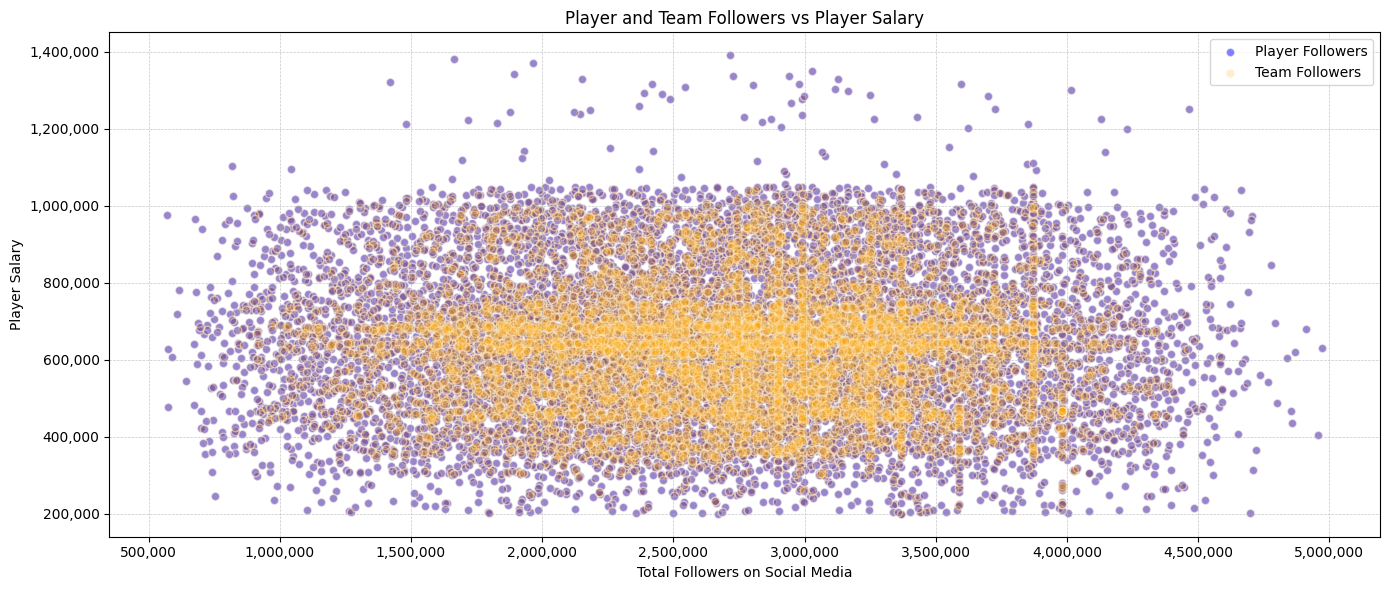

In [107]:
import sqlite3
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator, FuncFormatter

# connecting
conn = sqlite3.connect('esports_database.db')
cursor = conn.cursor()

# query both total team followers and total personal player followers on salary
query = """
    SELECT
        game_tag,
        salary,
        total_followers_on_social_media,
        total_team_social_media_followers
    FROM
        cleaned_combined_data_iqr
    WHERE
        salary IS NOT NULL AND
        total_followers_on_social_media IS NOT NULL AND
        total_team_social_media_followers IS NOT NULL;
"""
data = cursor.execute(query).fetchall()


player_followers = [row[2] for row in data]
team_followers = [row[3] for row in data]
salaries = [row[1] for row in data]


def format_tick(value, _):
    return f'{int(value):,}'

# making our scatter plot: player followers vs Salary and Team followers vs Salary
plt.figure(figsize=(14, 6))

# player followers vs salary
plt.scatter(player_followers, salaries, alpha=0.5, color='blue', edgecolors='w', label='Player Followers')

# plot team followers vs salary
plt.scatter(team_followers, salaries, alpha=0.2, color='orange', edgecolors='w', label='Team Followers')


plt.title('Player and Team Followers vs Player Salary')
plt.xlabel('Total Followers on Social Media')
plt.ylabel('Player Salary')


x_major_locator = MultipleLocator(500000)  # X-axis increments of 500,000
y_major_locator = MultipleLocator(200000)  # Y-axis increments of 200,000

ax = plt.gca()
ax.xaxis.set_major_locator(x_major_locator)
ax.yaxis.set_major_locator(y_major_locator)

ax.xaxis.set_major_formatter(FuncFormatter(format_tick))
ax.yaxis.set_major_formatter(FuncFormatter(format_tick))

plt.grid(True, which='both', linestyle='--', linewidth=0.5, alpha=0.7)

# adding a legend
plt.legend()

# showing our plot
plt.tight_layout()
plt.show()

# disconnect
conn.close()


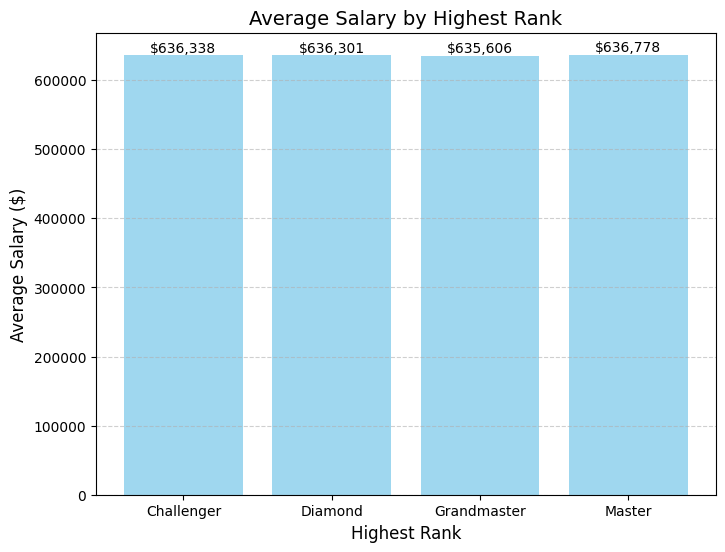

In [108]:
import sqlite3
import matplotlib.pyplot as plt

# connecting to SQLite
conn = sqlite3.connect('esports_database.db')
cursor = conn.cursor()

# calculate average salary by highest rank
query = """
    SELECT highest_rank, AVG(salary) AS avg_salary
    FROM cleaned_combined_data_iqr
    WHERE salary IS NOT NULL
    GROUP BY highest_rank
    ORDER BY highest_rank ASC;
"""
data = cursor.execute(query).fetchall()

highest_ranks = [row[0] for row in data]
average_salaries = [row[1] for row in data]

# creating the bar plot
plt.figure(figsize=(8, 6))
bars = plt.bar(highest_ranks, average_salaries, color='skyblue', alpha=0.8)


for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f"${int(height):,}",
             ha='center', va='bottom', fontsize=10)

# making the labels and title
plt.title('Average Salary by Highest Rank', fontsize=14)
plt.xlabel('Highest Rank', fontsize=12)
plt.ylabel('Average Salary ($)', fontsize=12)

# adding grid for easier readability
plt.grid(axis='y', linestyle='--', alpha=0.6)

# printing the plot
plt.show()

# disconnecting
conn.close()


In [109]:
import sqlite3
import matplotlib.pyplot as plt

# connecting to the db
conn = sqlite3.connect('esports_database.db')
cursor = conn.cursor()

# query win streaks by team
query = """
    SELECT team, team_win_streak
    FROM cleaned_combined_data_iqr
    ORDER BY team_win_streak DESC;
"""
data = cursor.execute(query).fetchall()


teams = [row[0] for row in data]
win_streaks = [row[1] for row in data]

# make a bar chart
plt.figure(figsize=(10, 6))
bars = plt.barh(teams, win_streaks, color='skyblue', alpha=0.8)

for bar in bars:
    width = bar.get_width()
    plt.text(width, bar.get_y() + bar.get_height() / 2, str(width),
             ha='left', va='center', fontsize=10)

# adding our labels and title
plt.title('Win Streaks by Team', fontsize=14)
plt.xlabel('Win Streaks', fontsize=12)
plt.ylabel('Team', fontsize=12)

# adding a grid for ease
plt.grid(axis='x', linestyle='--', alpha=0.6)

# print plot
plt.show()

#disconnect
conn.close()


KeyboardInterrupt: 

In [ ]:
import sqlite3
import matplotlib.pyplot as plt

# connecting to db
conn = sqlite3.connect('esports_database.db')
cursor = conn.cursor()

# finding the median salary per team
query = """
WITH RankedSalaries AS (
    SELECT
        team,
        salary,
        ROW_NUMBER() OVER (PARTITION BY team ORDER BY salary) AS rank_asc,
        COUNT(*) OVER (PARTITION BY team) AS total_salaries
    FROM cleaned_combined_data_iqr
    WHERE salary IS NOT NULL
)
SELECT
    team,
    AVG(salary) AS median_salary
FROM RankedSalaries
WHERE rank_asc IN ((total_salaries + 1) / 2, (total_salaries + 2) / 2)
GROUP BY team
ORDER BY median_salary DESC;
"""
data = cursor.execute(query).fetchall()

teams = [row[0] for row in data]
median_salaries = [row[1] for row in data]

# making a bar chart
plt.figure(figsize=(27, 6))
bars = plt.bar(teams, median_salaries, color='skyblue', alpha=0.8)

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f"${int(height):,}",
             ha='center', va='bottom', fontsize=10)

# adding labels and title
plt.title('Median Salary by Team', fontsize=9)
plt.xlabel('Team', fontsize=9)
plt.ylabel('Median Salary ($)', fontsize=9)

# making it a  grid
plt.grid(axis='y', linestyle='--', alpha=0.6)

#printing graph
plt.show()

#disconnecting
conn.close()


In [ ]:
import sqlite3
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

# connecting to sqlite3
conn = sqlite3.connect('esports_database.db')
cursor = conn.cursor()

#salary by winrate
query = """
    SELECT win_rate, salary
    FROM cleaned_combined_data_iqr
    WHERE win_rate IS NOT NULL AND salary IS NOT NULL;
"""
data = cursor.execute(query).fetchall()

win_rates = [row[0] for row in data]
salaries = [row[1] for row in data]

def format_tick(value, _):
    return f'{value:,.0f}'

# making our scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(win_rates, salaries, alpha=0.5, c='blue', edgecolors='w', linewidth=0.5)
plt.title('Salary vs Win Rate')
plt.xlabel('Win Rate')
plt.ylabel('Salary')

ax = plt.gca()
ax.yaxis.set_major_formatter(FuncFormatter(format_tick))

ax.xaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{x:.2f}'))  # Show win rate with 2 decimals

plt.grid(True, which='both', linestyle='--', linewidth=0.5, alpha=0.7)

# printing the plot
plt.show()

# disconnecting from qsqlite3
conn.close()


In [ ]:
import sqlite3
import matplotlib.pyplot as plt

# connecting sqlite3
conn = sqlite3.connect('esports_database.db')
cursor = conn.cursor()

# finding average salary by team tournament rank
query = """
    SELECT team_tournament_rank, AVG(salary) AS avg_salary
    FROM cleaned_combined_data_iqr
    WHERE salary IS NOT NULL AND team_tournament_rank IS NOT NULL
    GROUP BY team_tournament_rank
    ORDER BY team_tournament_rank ASC;
"""
data = cursor.execute(query).fetchall()

tournament_ranks = [row[0] for row in data]
average_salaries = [row[1] for row in data]

# making the bar plot
plt.figure(figsize=(10, 6))
bars = plt.bar(tournament_ranks, average_salaries, color='skyblue', alpha=0.8)

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f"${int(height):,}",
             ha='center', va='bottom', fontsize=10)

# making labels and title
plt.title('Average Salary by Team Tournament Rank', fontsize=14)
plt.xlabel('Team Tournament Rank', fontsize=12)
plt.ylabel('Average Salary ($)', fontsize=12)

# adding grid
plt.grid(axis='y', linestyle='--', alpha=0.6)

# printing the plot
plt.show()

#disconnecting
conn.close()


In [ ]:
import sqlite3
import matplotlib.pyplot as plt

# connecting to sqlite3
conn = sqlite3.connect('esports_database.db')
cursor = conn.cursor()

# top 3 regions by average salary
query = """
    SELECT region, AVG(salary) AS avg_salary
    FROM cleaned_combined_data_iqr
    WHERE salary IS NOT NULL
    GROUP BY region
    ORDER BY avg_salary DESC
    LIMIT 3;
"""
data = cursor.execute(query).fetchall()

regions = [row[0] for row in data]
average_salaries = [row[1] for row in data]

# making the bar plot
plt.figure(figsize=(8, 6))
bars = plt.bar(regions, average_salaries, color='skyblue', alpha=0.8)

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f"${int(height):,}",
             ha='center', va='bottom', fontsize=10)

# making labels and title
plt.title('Top 3 Regions by Average Salary', fontsize=14)
plt.xlabel('Region', fontsize=12)
plt.ylabel('Average Salary ($)', fontsize=12)

# adding grid
plt.grid(axis='y', linestyle='--', alpha=0.6)

# printing the plot
plt.show()

#disconnecting
conn.close()


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

#opening dataset, this is not in sqlite 3 query
file_path = 'cleaned_combined_data_iqr.csv'
df = pd.read_csv(file_path)

# makign a field for career length in years
df['career_length_years'] = df['career_length (days)'] / 365.0

# filter by role and find the avg salary and career length (in years)
role_grouped = df.groupby('role').agg({
    'salary': 'mean',
    'career_length_years': 'mean'
}).reset_index()

# group up data for plotting
roles = role_grouped['role']
average_salaries = role_grouped['salary']
average_career_lengths = role_grouped['career_length_years']

#dual bar plot for average salary and career length
fig, ax1 = plt.subplots(figsize=(12, 6))

#salary bar axis
bars1 = ax1.bar(roles, average_salaries, color='skyblue', alpha=0.8, label='Average Salary')
ax1.set_ylabel('Average Salary ($)', fontsize=12)
ax1.set_xlabel('Player Role', fontsize=12)
ax1.set_title('Average Salaries and Career Lengths by Player Role', fontsize=14)
ax1.tick_params(axis='y')
ax1.grid(axis='y', linestyle='--', alpha=0.6)

for bar in bars1:
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width() / 2, height, f"${int(height):,}",
             ha='center', va='bottom', fontsize=10)

# another axis for average career lengths
ax2 = ax1.twinx()
bars2 = ax2.plot(roles, average_career_lengths, color='orange', marker='o', label='Average Career Length (Years)')
ax2.set_ylabel('Average Career Length (Years)', fontsize=12)
ax2.tick_params(axis='y')

# small legend
fig.legend(loc="lower right", bbox_to_anchor=(1, 1), bbox_transform=ax1.transAxes)

# print the plot
plt.tight_layout()
plt.show()


In [ ]:
import sqlite3
import matplotlib.pyplot as plt
import pandas as pd

# connecting to db
conn = sqlite3.connect('esports_database.db')

# query to get player salary, team win rate, and average team tournament placement
query = """
    SELECT
        team_win_rate,
        team_recent_tournament_placement,
        salary
    FROM cleaned_combined_data_iqr
    WHERE team_win_rate IS NOT NULL
    AND team_recent_tournament_placement IS NOT NULL
    AND salary IS NOT NULL;
"""

data = pd.read_sql_query(query, conn)

# disconnect
conn.close()

# Binning data
data['win_rate_bin'] = pd.cut(data['team_win_rate'], bins=[0, 0.5, 0.6, 0.7, 0.8, 1.0], labels=['0-50%', '50-60%', '60-70%', '70-80%', '80-100%'])

data['placement_bin'] = pd.cut(data['team_recent_tournament_placement'], bins=[1, 3, 5, 7, 10], labels=['1-3', '4-5', '6-7', '8-10'])

# Box plot for salary distribution by win rate bin (without outliers)
plt.figure(figsize=(12, 6))
data.boxplot(column='salary', by='win_rate_bin', patch_artist=True, showfliers=False)
plt.title('Player Salary Distribution by Team Win Rate')
plt.xlabel('Team Win Rate Range')
plt.ylabel('Player Salary')
plt.suptitle('')  # Suppress default title from pandas boxplot
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

# Box plot for salary distribution by placement bin (without outliers)
plt.figure(figsize=(12, 6))
data.boxplot(column='salary', by='placement_bin', patch_artist=True, showfliers=False)
plt.title('Player Salary Distribution by Tournament Placement')
plt.xlabel('Tournament Placement Range')
plt.ylabel('Player Salary')
plt.suptitle('')  # Suppress default title from pandas boxplot
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()


#Linear Regression
1. encoding in both one hot encoding and ordinal encoding
2. feature scaling for the encoded features
3. training the dataset (pulled from our sqlite3 database)
4. making test cases
5. evaluate the salary prediction model


In [118]:
from sklearn.preprocessing import OneHotEncoder
import pandas as pd

# reading the dataset
df = pd.read_csv('cleaned_combined_data_iqr.csv')

# One-Hot encode on team_tournament_rank
encoder_rank = OneHotEncoder(sparse_output=False)
rank_ohe = encoder_rank.fit_transform(df[['team_tournament_rank']])
rank_cols = encoder_rank.get_feature_names_out(['team_tournament_rank'])
rank_ohe_df = pd.DataFrame(rank_ohe, columns=rank_cols)

# One-Hot encode 'region'
encoder_region = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
region_ohe = encoder_region.fit_transform(df[['region']])
region_cols = encoder_region.get_feature_names_out(['region'])
region_ohe_df = pd.DataFrame(region_ohe, columns=region_cols)

# feature scaling features to reduce their influence to only being very slight
region_ohe_df = region_ohe_df * 0.1

# use Ordinal encoding on 'highest_rank' so that master has the highest influence of the other ranks
rank_order = {'Master': 3, 'Grandmaster': 2, 'Diamond': 4, 'Challenger': 1}
df['rank_ordinal'] = df['highest_rank'].map(rank_order)

# feature scaling 'rank_ordinal' to have a smaller influence
df['rank_ordinal_scaled'] = df['rank_ordinal'] * 0.1

# adding a field for median salary by team
median_salary_by_team = df.groupby('team')['salary'].median()
df['median_salary_by_team'] = df['team'].map(median_salary_by_team)

# adding median win rate by team tournament rank for capturing win-rate influence per rank
median_win_rate_by_rank = df.groupby('team_tournament_rank')['win_rate'].median()
df['median_win_rate_by_rank'] = df['team_tournament_rank'].map(median_win_rate_by_rank)

# adding weight to role vs salary scale based on the role played
role_pay_scale = {'ADC': 1, 'Top': 0.9, 'Jungle': 0.8, 'Support': 0.7, 'Mid': 0.6}

# create the pay scale to the 'role' column (creating a new column 'role_pay')
df['role_pay'] = df['role'].map(role_pay_scale)

# make new encoded columns to the merged dataframe
df_merged = pd.concat([df, rank_ohe_df, region_ohe_df], axis=1)

# remove original categorical columns to avoid redundancy in the final dataset
df_merged.drop(columns=['team_tournament_rank', 'region', 'highest_rank', 'team', 'role'], inplace=True)

# print out the resulting dataframe
df_merged.head()


,game_tag,highest_account_level,games_played,win_rate,career_length (days),average_tournament_placement,salary,winnings,socmed_twitter_followers,socmed_instagram_followers,...,rank_ordinal_scaled,median_salary_by_team,role_pay,team_tournament_rank_A-Tier,team_tournament_rank_B-Tier,team_tournament_rank_C-Tier,team_tournament_rank_S-Tier,region_LCK (KR),region_LCS (NA),region_LEC (EU)
0,IceWarrior292,425,48,0,2276,4,349109,259988,122958,1830213,...,0,635450,1,0,1,0,0,0,0,0
1,FireWarrior388,522,31,0,1363,6,282010,5697,672155,987665,...,0,450056,1,0,0,1,0,0,0,0
2,IceLord172,501,35,1,2110,7,536213,198106,132932,1750033,...,0,643057,1,1,0,0,0,0,0,0
3,StormMaster474,380,40,0,826,4,208485,4290,1415414,897366,...,0,467864,1,0,0,1,0,0,0,0
4,SkyMaster173,401,69,1,573,10,546887,4927,260178,1627140,...,0,450056,1,0,0,1,0,0,0,0


In [119]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd


x = pd.concat([
    df[['win_rate', 'median_win_rate_by_rank', 'rank_ordinal_scaled', 'median_salary_by_team', 'role_pay']],  # Numerical features including role_pay
    rank_ohe_df,  # One-hot encoded team_tournament_rank
    region_ohe_df  # One-hot encoded region with reduced influence
], axis=1)

y = df['salary']  # our target variable is salary

# move the dataset into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# start training the model
model = LinearRegression()
model.fit(x_train, y_train)

# start with predicting on the test set
y_test_pred = model.predict(x_test)

# metrics for the model on the test set
mse = mean_squared_error(y_test, y_test_pred)
r2 = r2_score(y_test, y_test_pred)

# print
print("\nModel Evaluation:")
print(f"Mean Squared Error (MSE): {mse}")
print(f"R² Score: {r2}")

print("\nModel Coefficients:")
for feature, coef in zip(x.columns, model.coef_):
    print(f"{feature}: {coef}")

print("\nModel Intercept:", model.intercept_)



Model Evaluation:
Mean Squared Error (MSE): 24021235575.92781
R² Score: 0.3370303350743864

Model Coefficients:
win_rate: 928373.9789121029
median_win_rate_by_rank: -725.913560786594
rank_ordinal_scaled: 3264.5408003034413
median_salary_by_team: 0.57383252977354
role_pay: 11383.798092531872
team_tournament_rank_A-Tier: 14565.52684562222
team_tournament_rank_B-Tier: 20401.045139137765
team_tournament_rank_C-Tier: -58964.40447615845
team_tournament_rank_S-Tier: 23997.83249139846
region_LCK (KR): 99157.13783000028
region_LCS (NA): -81536.93414565077
region_LEC (EU): -17620.203684349588

Model Intercept: -220213.88792108558


In [120]:
# Define the test cases with 'role' added
test_case = [
    ('S-Tier', 'KR', 'Challenger', 0.72, 'DRX', 'ADC'),  # Added team for median_salary_by_team and role
    ('A-Tier', 'NA', 'Master', 0.60, 'Fnatic', 'Top'),
    ('C-Tier', 'EU', 'Diamond', 0.45, 'Never Sleep', 'Jungle'),
    ('B-Tier', 'KR', 'Grandmaster', 0.65, 'T1', 'Support'),
    ('A-Tier', 'EU', 'Diamond', 0.50, 'Golden Dragon', 'Mid'),
]

# Convert test cases to DataFrame
test_df = pd.DataFrame(test_case, columns=['team_tournament_rank', 'region', 'highest_rank', 'win_rate', 'team', 'role'])

# add 'median_win_rate_by_rank' to test_df using the same mapping from training
test_df['median_win_rate_by_rank'] = test_df['team_tournament_rank'].map(median_winrate_by_rank)

# add 'median_salary_by_team' to test_df using the same mapping from training
test_df['median_salary_by_team'] = test_df['team'].map(median_salary_by_team)

# Ordinal encode 'highest_rank' and scale it
test_df['rank_ordinal'] = test_df['highest_rank'].map(rank_order)
test_df['rank_ordinal_scaled'] = test_df['rank_ordinal'] * 0.1  # Apply scaling as in training

# make 'role_pay' feature based on the given roles
role_pay_mapping = {'ADC': 1.1, 'Top': 1.05, 'Jungle': 1.0, 'Support': 0.95, 'Mid': 0.9}
test_df['role_pay'] = test_df['role'].map(role_pay_mapping)

# encode 'team_tournament_rank'
test_rank_ohe = encoder_rank.transform(test_df[['team_tournament_rank']])
test_rank_df = pd.DataFrame(test_rank_ohe, columns=rank_cols)

# encode 'region'
test_region_ohe = encoder_region.transform(test_df[['region']])
test_region_df = pd.DataFrame(test_region_ohe, columns=region_cols)

# merge all features into the final test DataFrame
test_X = pd.concat([
    test_df[['win_rate', 'median_win_rate_by_rank', 'rank_ordinal_scaled', 'median_salary_by_team', 'role_pay']],  # Added role_pay
    test_rank_df,
    test_region_df
], axis=1)

# making sure our  test cases include the same features and order as x_train
test_X = test_X[x_train.columns]

# making predictions and printing
predicted_salaries = model.predict(test_X)

print("Test Case Predictions:")
for i, case in enumerate(test_case):
    print(f"Input: {case}, Predicted Salary: {predicted_salaries[i]}")


Test Case Predictions:
Input: ('S-Tier', 'KR', 'Challenger', 0.72, 'DRX', 'ADC'), Predicted Salary: 880791.6282184008
Input: ('A-Tier', 'NA', 'Master', 0.6, 'Fnatic', 'Top'), Predicted Salary: 755244.5529775032
Input: ('C-Tier', 'EU', 'Diamond', 0.45, 'Never Sleep', 'Jungle'), Predicted Salary: 419370.4610486062
Input: ('B-Tier', 'KR', 'Grandmaster', 0.65, 'T1', 'Support'), Predicted Salary: 801732.9266814538
Input: ('A-Tier', 'EU', 'Diamond', 0.5, 'Golden Dragon', 'Mid'), Predicted Salary: 533633.4963451284


In [121]:
#reprinting metrics
print("Model Coefficients:", model.coef_)
print("Model Intercept:", model.intercept_)
from sklearn.metrics import mean_squared_error, r2_score

y_test_pred = model.predict(x_test)
print("MSE:", mean_squared_error(y_test, y_test_pred))
print("R²:", r2_score(y_test, y_test_pred))


Model Coefficients: [ 9.28373979e+05 -7.25913561e+02  3.26454080e+03  5.73832530e-01
  1.13837981e+04  1.45655268e+04  2.04010451e+04 -5.89644045e+04
  2.39978325e+04  9.91571378e+04 -8.15369341e+04 -1.76202037e+04]
Model Intercept: -220213.88792108558
MSE: 24021235575.92781
R²: 0.3370303350743864
